# Examples

In [ ]:
# Copyright (c) 2017-2018 Spotify AB
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import chartify

# Blank charts


    import chartify

    # Blank charts tell you how to fill in the labels
    ch = chartify.Chart()
    ch.show('png')



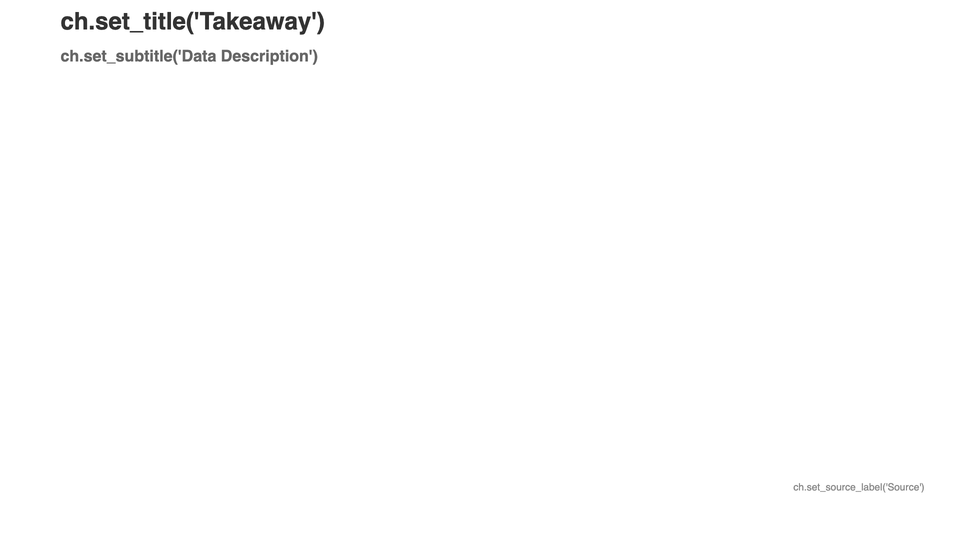

In [2]:
chartify.examples.chart_blank()

# Example data

In [3]:
chartify.examples.example_data().head(10)

date country   fruit  unit_price  quantity  total_price
0 2017-10-21      US  Banana    0.303711         4     1.214846
1 2017-05-30      JP  Banana    0.254109         4     1.016436
2 2017-05-21      CA  Banana    0.268635         4     1.074539
3 2017-09-18      BR   Grape    2.215277         2     4.430554
4 2017-12-08      US  Banana    0.308337         5     1.541687
5 2017-06-05      GB   Apple    0.870118         2     1.740235
6 2017-09-05      JP  Banana    0.279179         7     1.954252
7 2017-08-27      CA   Apple    1.025265         4     4.101059
8 2017-09-14      CA   Apple    1.078831         4     4.315324
9 2017-05-26      GB   Grape    1.840909         2     3.681818

# Both Numerical Axes

## Scatter

Scatter plot.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            size_column (str, optional): Column name of numerical values
                to plot on the size dimension.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional): List of values within the
                'color_column' for specific sorting of the colors.
            alpha (float): Alpha value.
            marker (str): marker type. Valid types:
                'asterisk', 'circle', 'circle_cross', 'circle_x', 'cross',
                'diamond', 'diamond_cross', 'hex', 'inverted_triangle',
                'square', 'square_x', 'square_cross', 'triangle',
                'x', '*', '+', 'o', 'ox', 'o+'
        

    import chartify

    # Generate example data
    

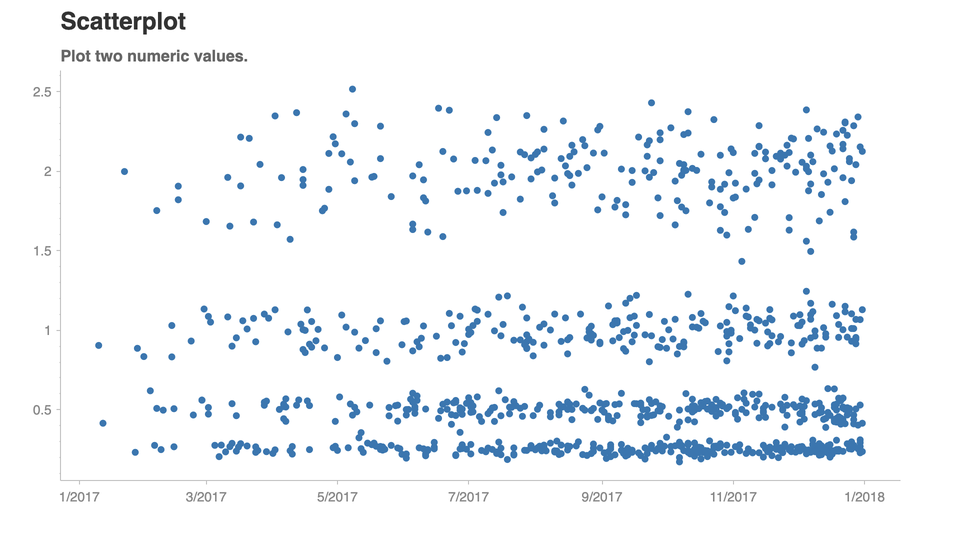


    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type="datetime")
    ch.plot.scatter(data_frame=data, x_column="date", y_column="unit_price", size_column="quantity")
    ch.set_title("Scatterplot")
    ch.set_subtitle("Optional 'size_column' argument for changing scatter size.")
    ch.show('png')



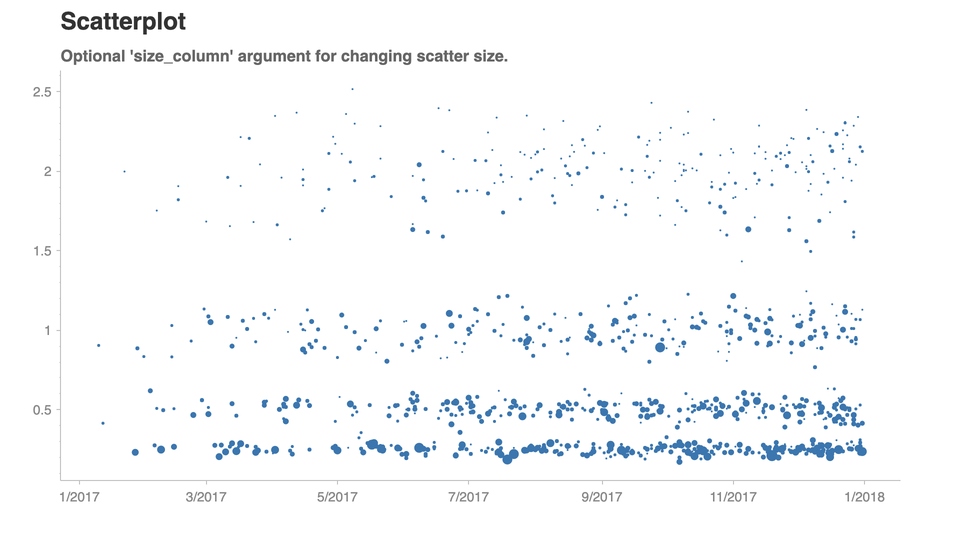


    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type="datetime")
    ch.plot.scatter(
        data_frame=data,
        x_column="date",
        y_column="unit_price",
        size_column="quantity",
        color_column="fruit",
    )
    ch.set_title("Scatterplot")
    ch.set_subtitle("Optional 'color_column' argument for grouping by color.")
    ch.show('png')



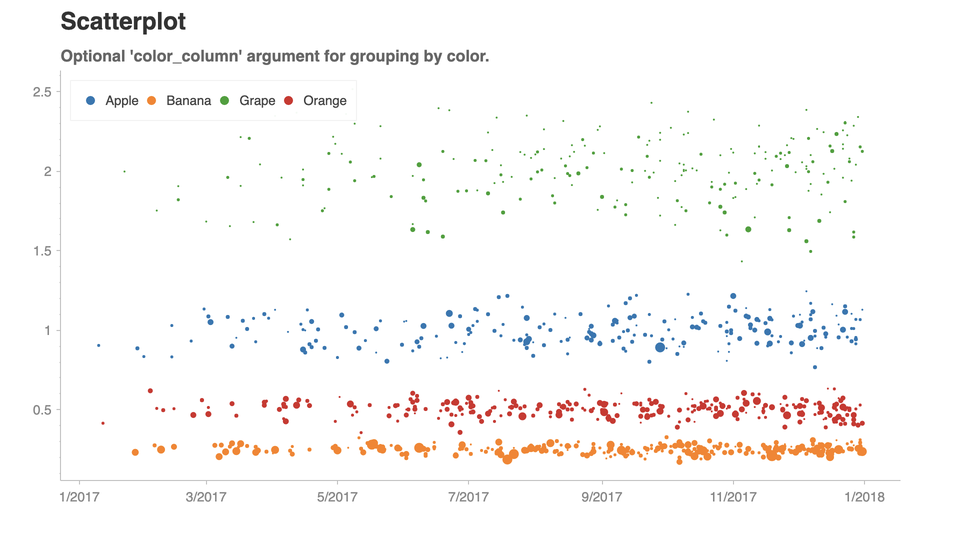

In [4]:
print(chartify.examples.plot_scatter.__doc__)
chartify.examples.plot_scatter()

## Text

Text plot.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            text_column (str): Column name to plot as text labels.
            color_column (str, optional): Column name to group by on the
                color dimension.
            color_order (list, optional): List of values within the
                'color_column' for specific sorting of the colors.
            font_size (str, optional): Size of text.
            x_offset (int, optional): # of pixels for horizontal text offset.
                Can be negative. Default: 0.
            y_offset (int, optional): # of pixels for vertical text offset.
                Can be negative. Default: 0.
            angle (int): Degrees from horizontal for text rotation.
            text_color (str): Color name or hex value.
                See chartify.color_palettes.show() 

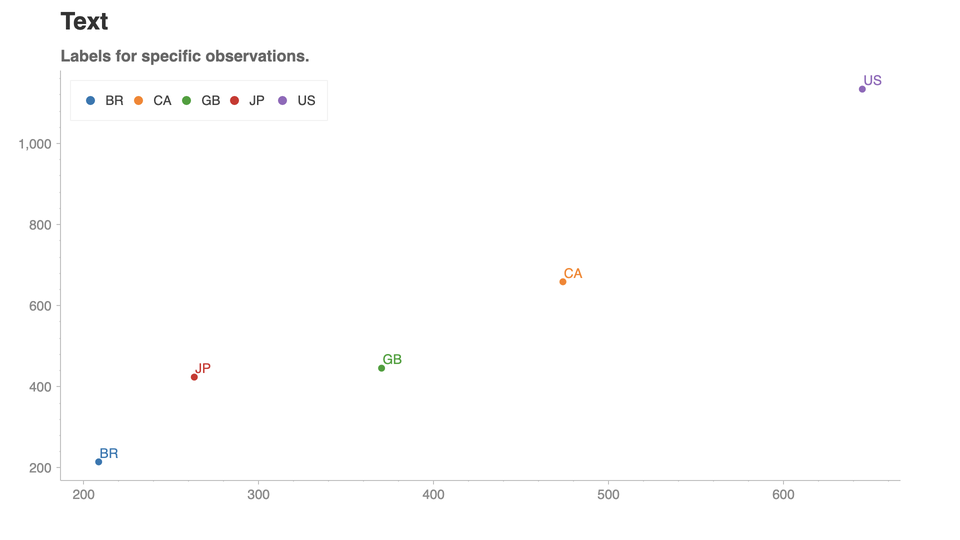

In [5]:
print(chartify.examples.plot_text.__doc__)
chartify.examples.plot_text()

## Line

Line Chart.

        Note:
            This method will not automatically sort the x-axis.
            Try sorting the axis if the line graph looks strange.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional): List of values within the
                'color_column' for specific sorting of the colors.
            line_dash (str, optional): Dash style for the line. One of:
                - 'solid'
                - 'dashed'
                - 'dotted'
                - 'dotdash'
                - 'dashdot'
            line_width (int, optional): Width of the line
            alpha (float): Alpha value.
        

    import chartify

    # Generate example data
    data = chartify.example

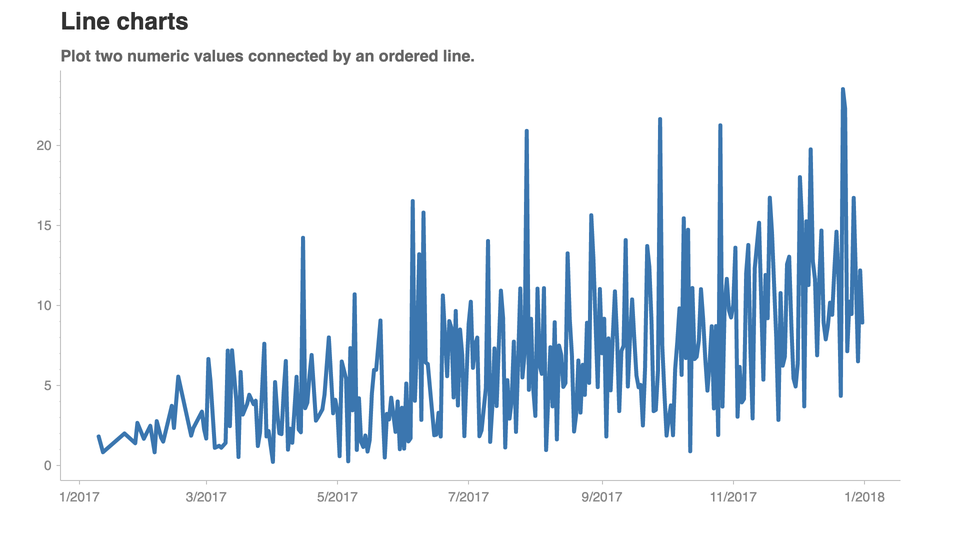


    price_by_date_and_country = (
        data.groupby(["date", "fruit"])["total_price"]
        .sum()
        .reset_index()  # Move 'date' and 'country' from index to column
    )
    print(price_by_date_and_country.head())
    
        date   fruit  total_price
0 2017-01-10   Apple     1.808778
1 2017-01-12  Orange     0.829621
2 2017-01-22   Grape     1.998476
3 2017-01-27  Banana     1.390764
4 2017-01-28   Apple     2.658465

    ch = chartify.Chart(blank_labels=True, x_axis_type="datetime")
    ch.set_title("Line charts - Grouped by color")
    ch.plot.line(
        # Data must be sorted by x column
        data_frame=price_by_date_and_country.sort_values("date"),
        x_column="date",
        y_column="total_price",
        color_column="fruit",
    )
    ch.show('png')



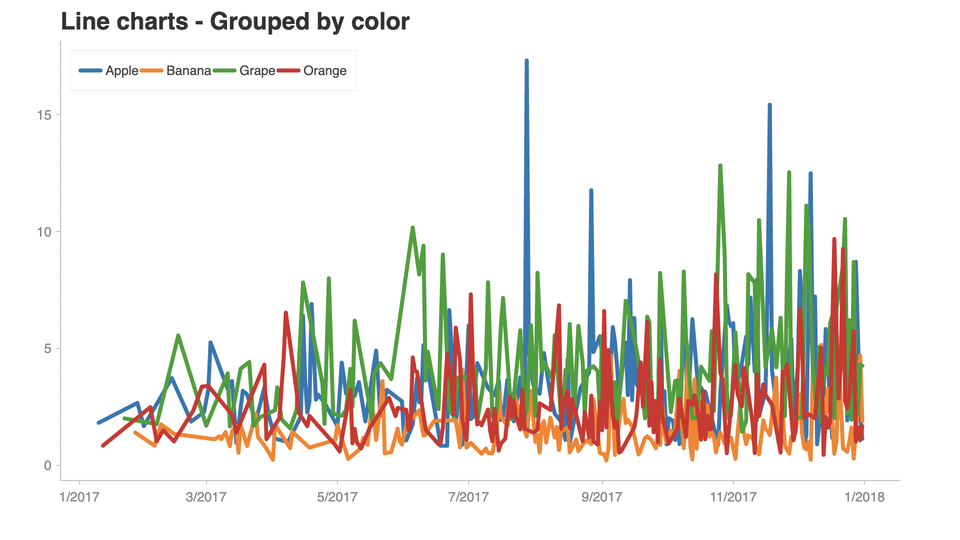

In [6]:
print(chartify.examples.plot_line.__doc__)
chartify.examples.plot_line()

# Area

Area plot.

        Note:
            - When a single y_column is passed: Shade area between the
                y_values and zero.
            - Use `stacked` argument for stacked areas.
            - When both y_column and second_y_column are passed:
                Shade area between the two y_columns.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            second_y_column (str, optional): Column name to plot on
                the y axis.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional): List of values within the
                'color_column' for specific sorting of the colors.
            stacked (bool, optional): Stacked the areas.
                Only applicable with a single y_column.
                Default: False.
 

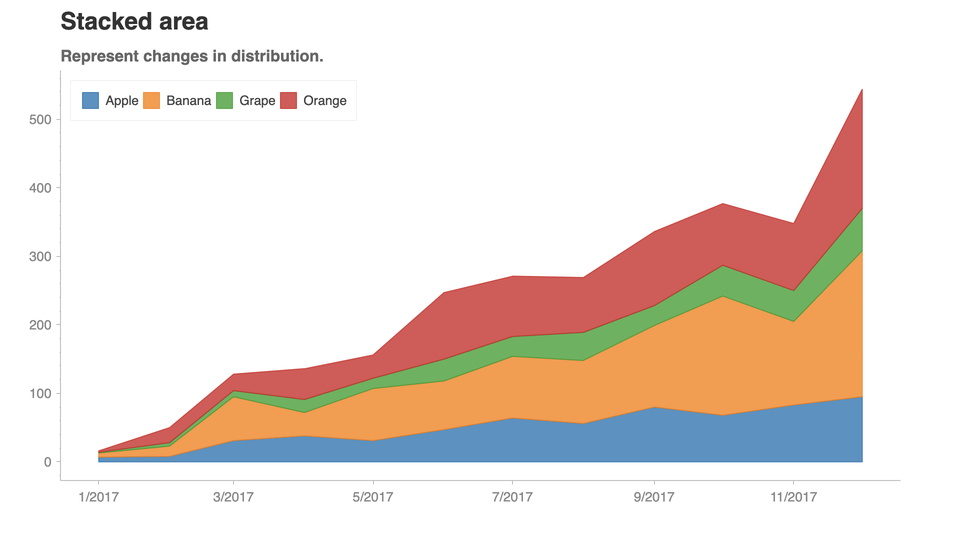


    ch = chartify.Chart(blank_labels=True, x_axis_type="datetime")
    ch.set_title("Unstacked area")
    ch.set_subtitle("Show overlapping values. Automatically adjusts opacity.")
    ch.plot.area(
        data_frame=total_quantity_by_month_and_fruit,
        x_column="month",
        y_column="quantity",
        color_column="fruit",
        stacked=False,
    )
    ch.show('png')



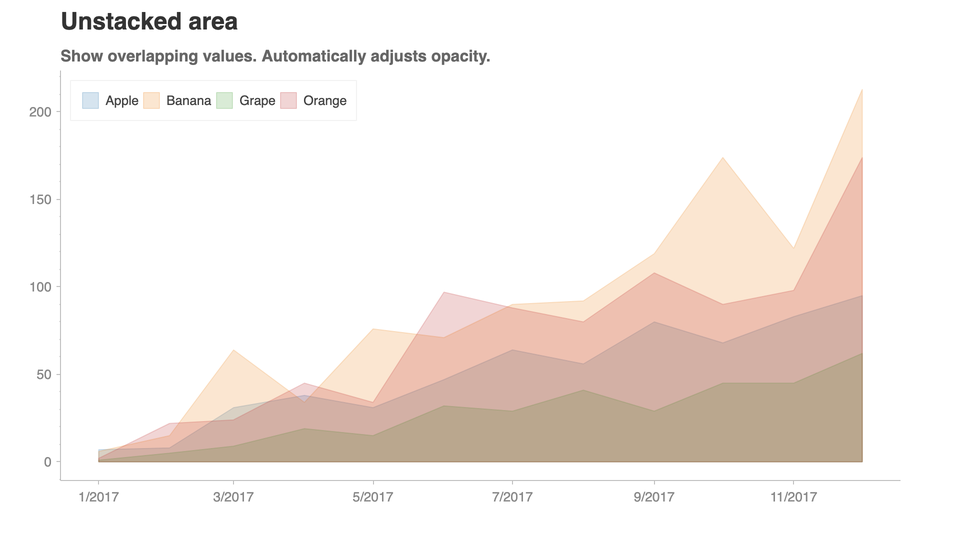



    # Sum price grouped by date
    price_by_date = (
        data.groupby(["date"])["total_price"]
        .agg(["mean", "std", "count"])
        .loc["2017-12-01":]
        .assign(
            lower_ci=lambda x: x["mean"] - 1.96 * x["std"] / x["count"] ** 0.5,
            upper_ci=lambda x: x["mean"] + 1.96 * x["std"] / x["count"] ** 0.5,
        )
        .reset_index()
    )
    print(price_by_date.head())
    
        date      mean       std  count  lower_ci  upper_ci
0 2017-12-01  2.130242  1.723854      3  0.179518  4.080967
1 2017-12-02  1.801198  1.385051     10  0.942735  2.659662
2 2017-12-03  2.157626  1.163018      7  1.296050  3.019202
3 2017-12-04  0.923048  0.472394      4  0.460102  1.385994
4 2017-12-05  2.179000  1.258695      7  1.246546  3.111454

    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type="datetime")
    ch.set_title("Area with second_y_column")
    ch.set_subtitle("Use alone or combined with line graphs to represent confidence.

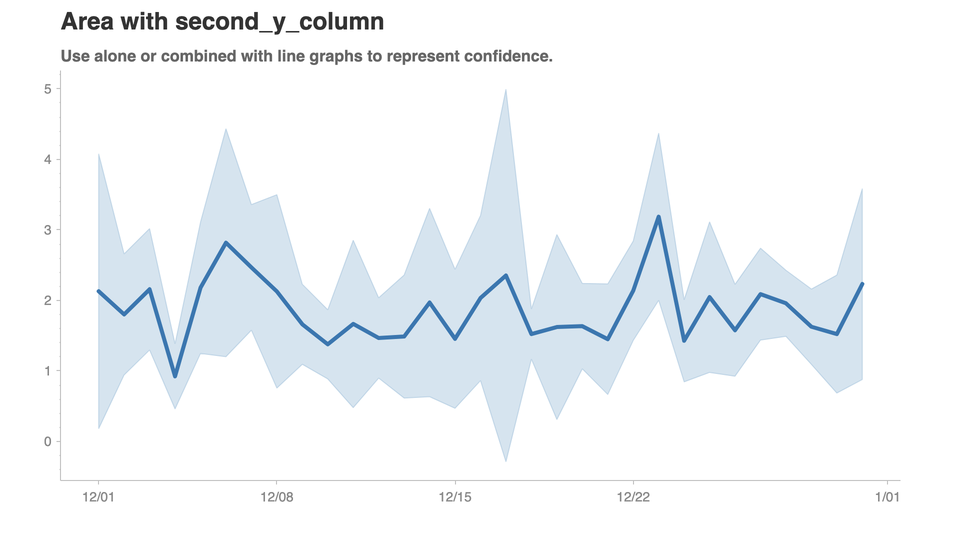

In [7]:
print(chartify.examples.plot_area.__doc__)
chartify.examples.plot_area()

# Numeric axis & Categorical Axis

## Bar plot

Bar chart.

        Note:
            To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on
                the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional): List of values within the
                'color_column' for specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical
                    axis values. Default.
                - 'labels': Order categorical axis by the categorical labels.
                - array-like obje

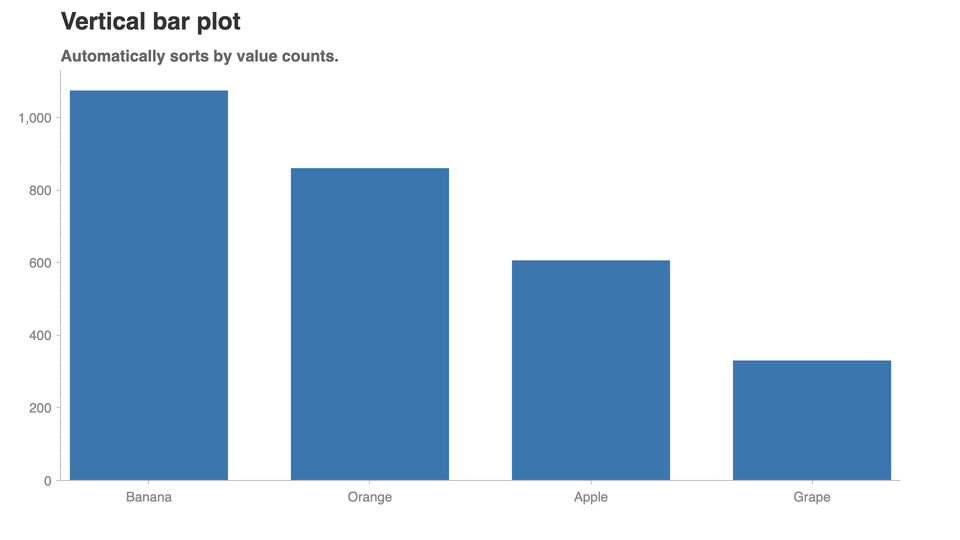


    ch = chartify.Chart(blank_labels=True, x_axis_type="categorical")
    ch.set_title("Vertical bar plot - Label sort")
    ch.set_subtitle("Set `categorical_order_by` to sort by labels")
    ch.plot.bar(
        data_frame=quantity_by_fruit,
        categorical_columns="fruit",
        numeric_column="quantity",
        categorical_order_by="labels",
        categorical_order_ascending=True,
    )
    ch.show('png')



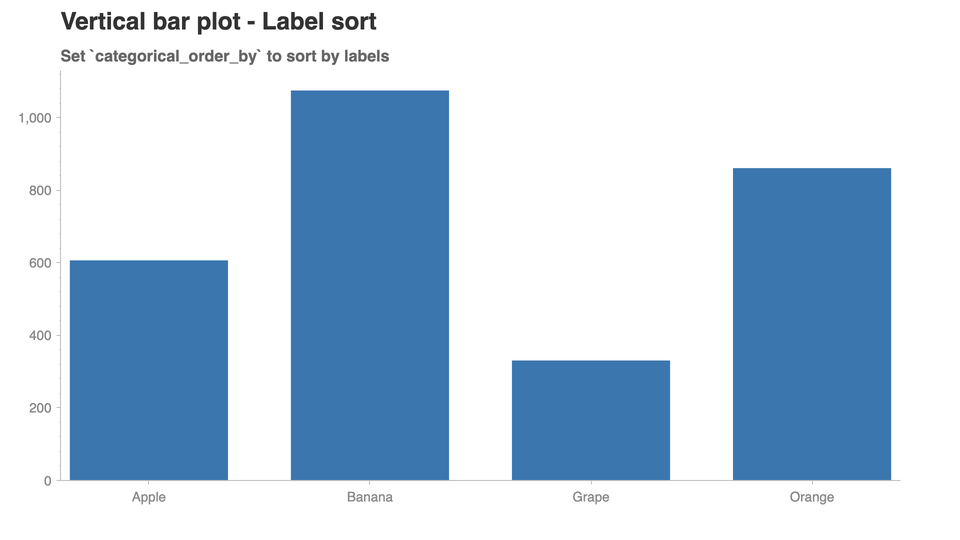


    ch = chartify.Chart(blank_labels=True, y_axis_type="categorical")
    ch.set_title("Horizontal bar plot")
    ch.set_subtitle("Horizontal with color grouping")
    ch.plot.bar(
        data_frame=quantity_by_fruit,
        categorical_columns="fruit",
        numeric_column="quantity",
        color_column="fruit",
    )
    ch.show('png')



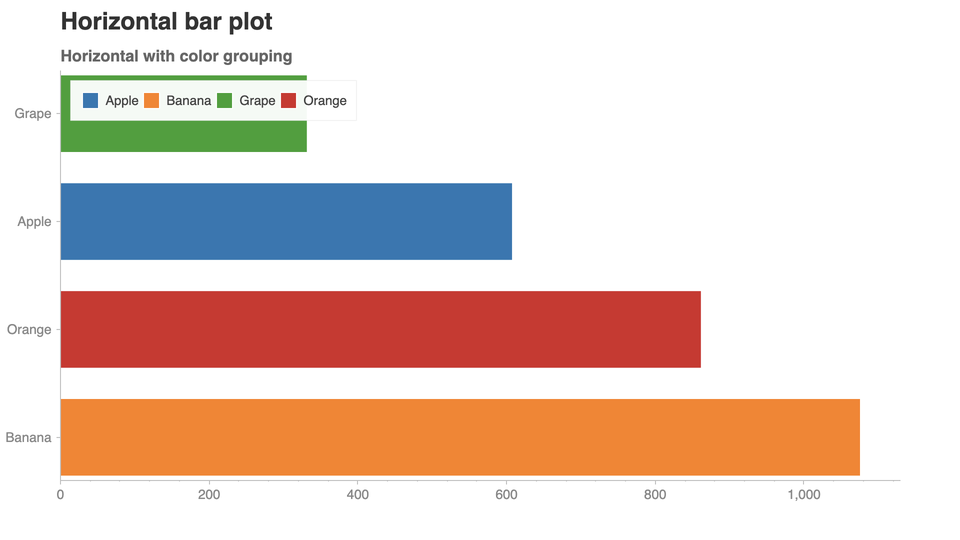


    ch = chartify.Chart(x_axis_type="categorical", blank_labels=True)
    ch.set_title("Vertical bar plot with labels")
    ch.set_subtitle("Hidden y-axis")
    ch.plot.bar(
        data_frame=quantity_by_fruit,
        categorical_columns="fruit",
        numeric_column="quantity",
        color_column="fruit",
    )
    ch.style.color_palette.reset_palette_order()
    ch.plot.text(
        data_frame=quantity_by_fruit,
        categorical_columns="fruit",
        numeric_column="quantity",
        text_column="quantity",
        color_column="fruit",
    )
    # Adjust the axis range to prevent clipping of the text labels.
    ch.axes.set_yaxis_range(0, 1200)
    ch.axes.hide_yaxis()
    ch.show('png')



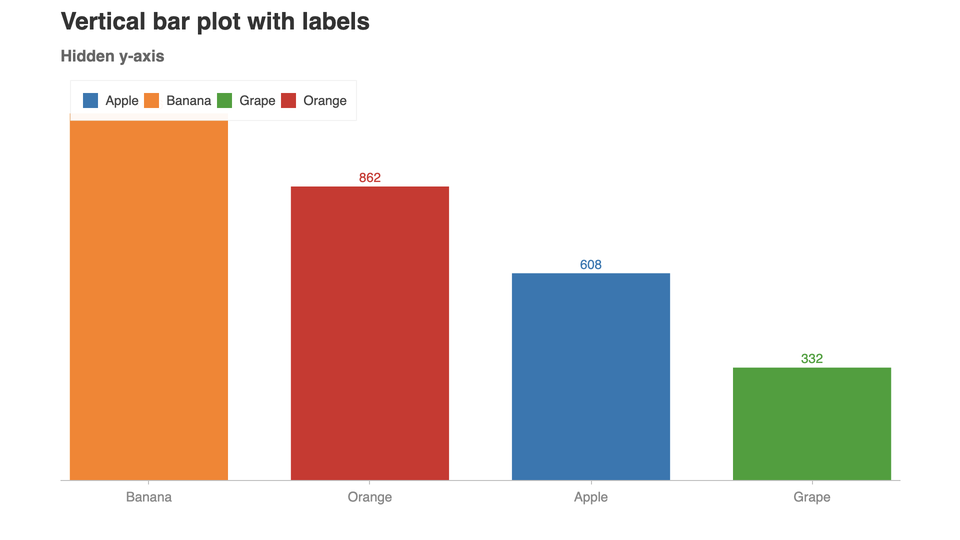

In [8]:
print(chartify.examples.plot_bar.__doc__)
chartify.examples.plot_bar()

## Bar (grouped)


    Grouped bar example.

    ch.plot.bar() docstring:
    Bar chart.

        Note:
            To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on
                the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional): List of values within the
                'color_column' for specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical
                    axis values. Default.
                - 'labels': Order categorical axis 

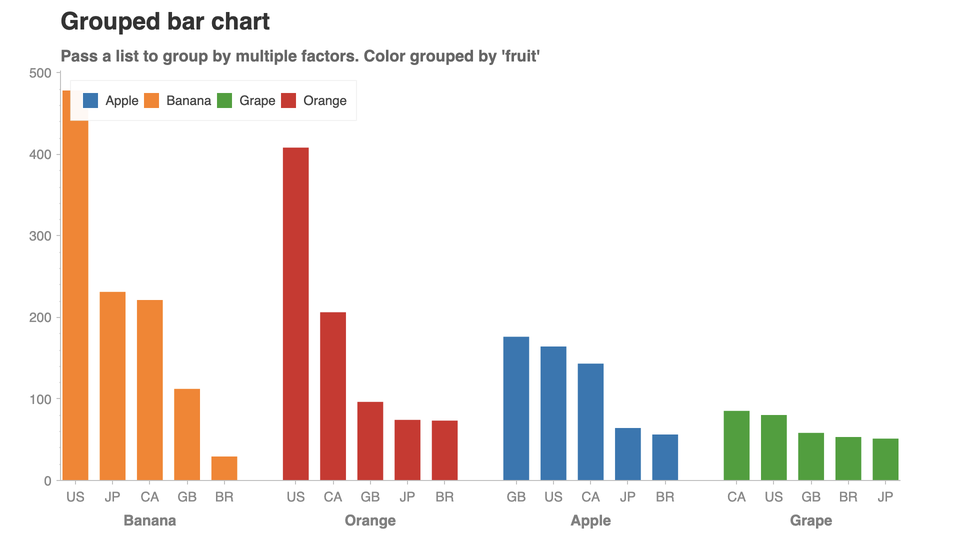


    ch = chartify.Chart(blank_labels=True, x_axis_type="categorical")
    ch.set_title("Grouped bar chart - Color groupings")
    ch.set_subtitle("Change color independent of the axis factors. Color grouped by 'country'")
    ch.plot.bar(
        data_frame=quantity_by_fruit_and_country,
        categorical_columns=["fruit", "country"],
        numeric_column="quantity",
        color_column="country",
    )
    ch.show('png')



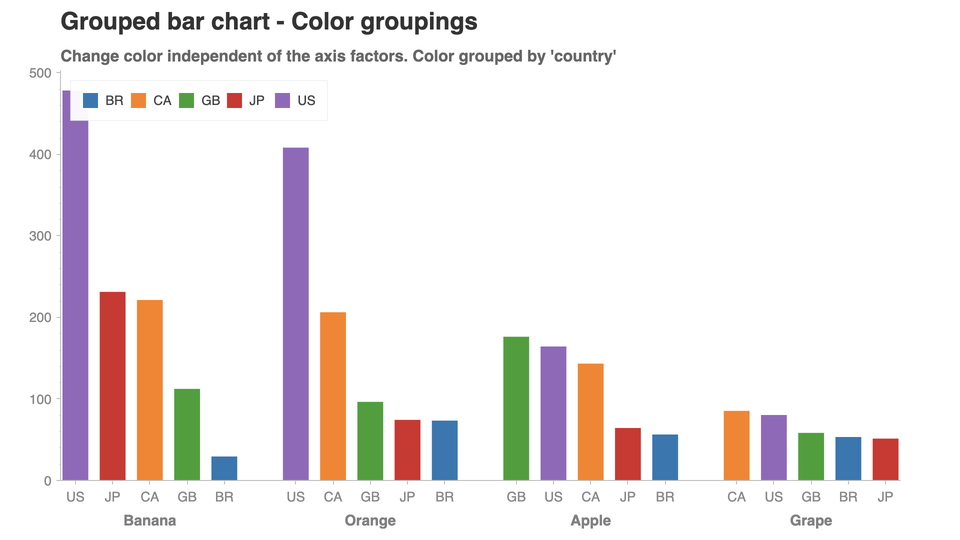


    ch = chartify.Chart(blank_labels=True, x_axis_type="categorical")
    ch.set_title("Grouped bar chart - Group hierarchy order")
    ch.set_subtitle("Change chage order of 'categorical_column' list to switch grouping hierarchy.")
    ch.plot.bar(
        data_frame=quantity_by_fruit_and_country,
        categorical_columns=["country", "fruit"],
        numeric_column="quantity",
        color_column="country",
    )
    ch.axes.set_xaxis_tick_orientation("vertical")
    ch.show('png')



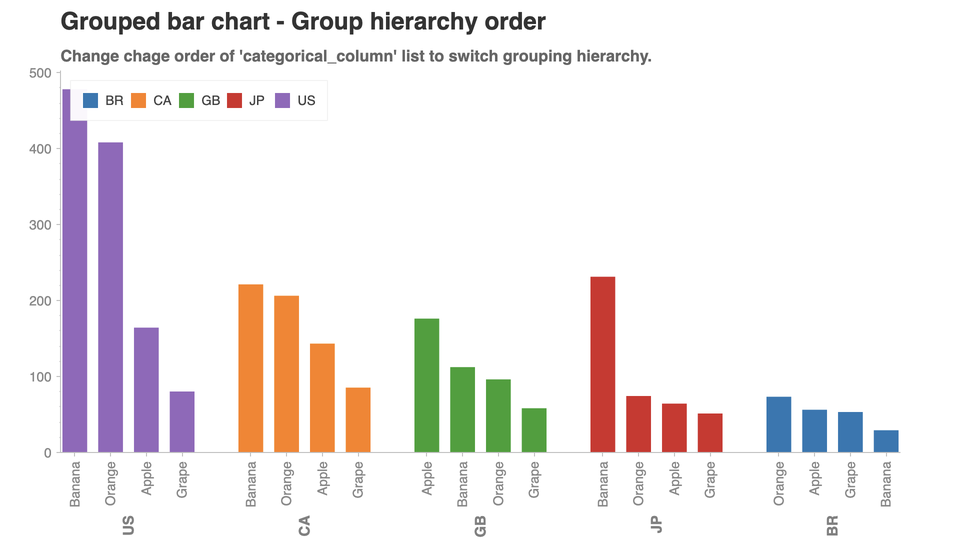


    ch = chartify.Chart(blank_labels=True, x_axis_type="categorical")
    ch.set_title("Grouped bar chart - Factor order")
    ch.set_subtitle("Change categorical order with 'categorical_order_by'.")
    ch.plot.bar(
        data_frame=quantity_by_fruit_and_country,
        categorical_columns=["country", "fruit"],
        numeric_column="quantity",
        color_column="country",
        categorical_order_by="labels",
        categorical_order_ascending=True,
    )
    ch.axes.set_xaxis_tick_orientation("vertical")
    ch.show('png')



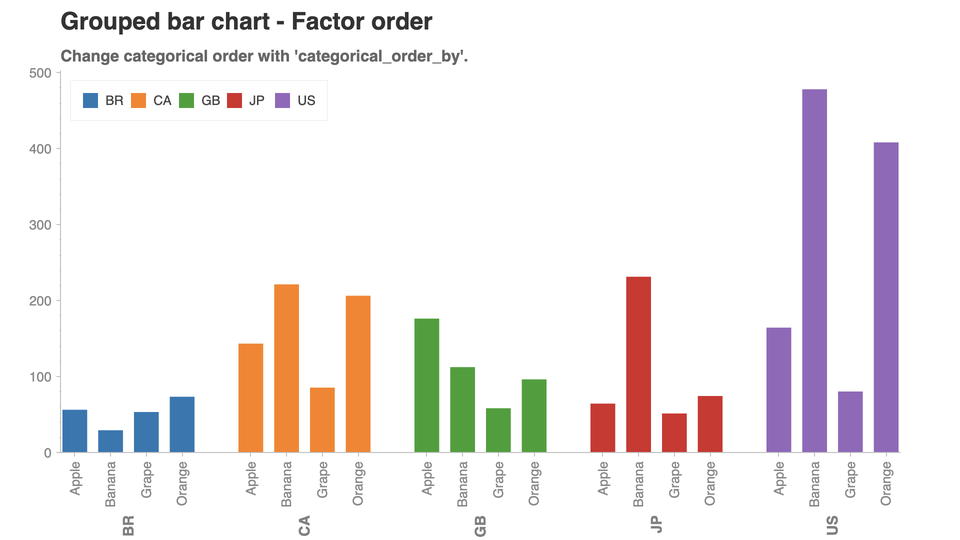

In [9]:
print(chartify.examples.plot_bar_grouped.__doc__)
chartify.examples.plot_bar_grouped()

# Boxplot

Box-and-whisker plot.

        Note:
            To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on
                the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional):
                List of values within the 'color_column' for
                    specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'labels'.
                - 'labels': Order categorical axis by the categorical labels.
                - array-like object (list, tuple, np.array): New labels
                    to conform the categ

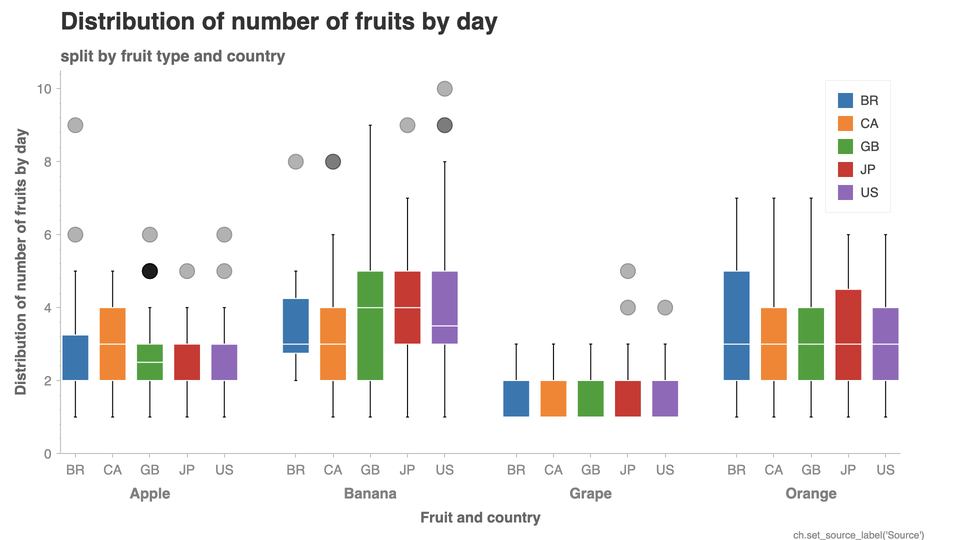

In [10]:
print(chartify.examples.plot_boxplot.__doc__)
chartify.examples.plot_boxplot()

# Interval

Interval.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on
                the categorical axis.
            lower_bound_column (str): Column name to plot on the
                numerical axis for the lower bound.
            upper_bound_column (str): Column name to plot on the
                numerical axis for the upper bound.
            middle_column (str, optional): Column name to plot on the
                numerical axis for the middle tick.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical
                    axis values. Default.
                - 'labels': Order categorical axis by the categorical labels.
                - array-like object (list, tuple, np.array): New labels
                    to conform the cate

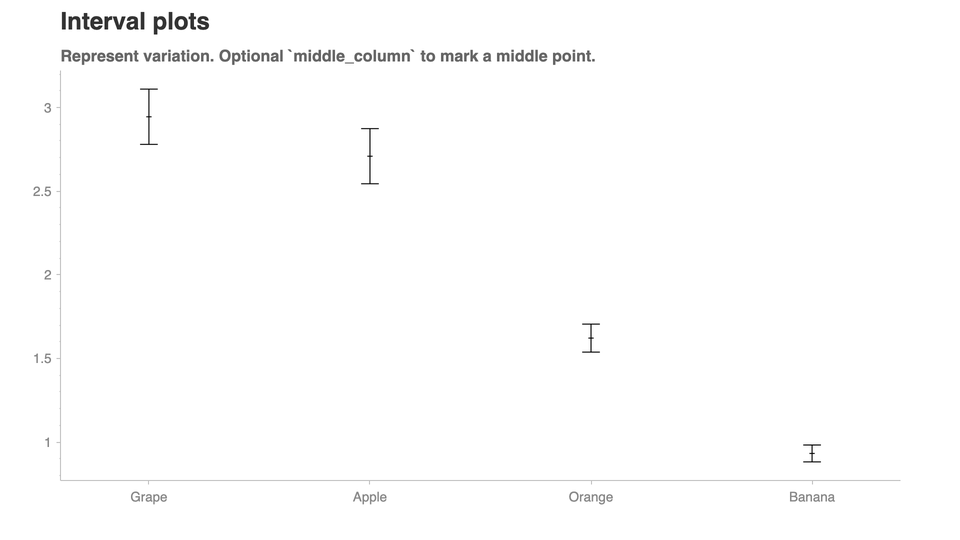


    ch = chartify.Chart(blank_labels=True, x_axis_type="categorical")
    ch.set_title("Combined interval plot & bar plot")
    ch.plot.bar(
        data_frame=avg_price_with_interval,
        categorical_columns="fruit",
        numeric_column="mean",
    )
    ch.plot.interval(
        data_frame=avg_price_with_interval,
        categorical_columns="fruit",
        lower_bound_column="lower_ci",
        upper_bound_column="upper_ci",
    )
    ch.show('png')



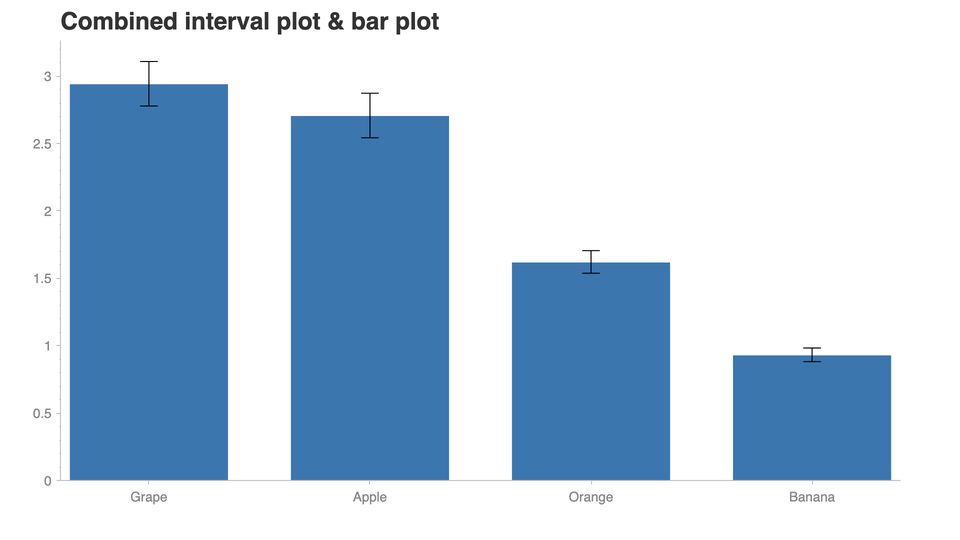

In [11]:
print(chartify.examples.plot_interval.__doc__)
chartify.examples.plot_interval()

## Lollipop

Lollipop chart.

        Note:
            To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on
                the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional):
                List of values within the 'color_column' for
                    specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical axis values.
                - 'labels': Order categorical axis by the categorical labels.
                - array-like object (

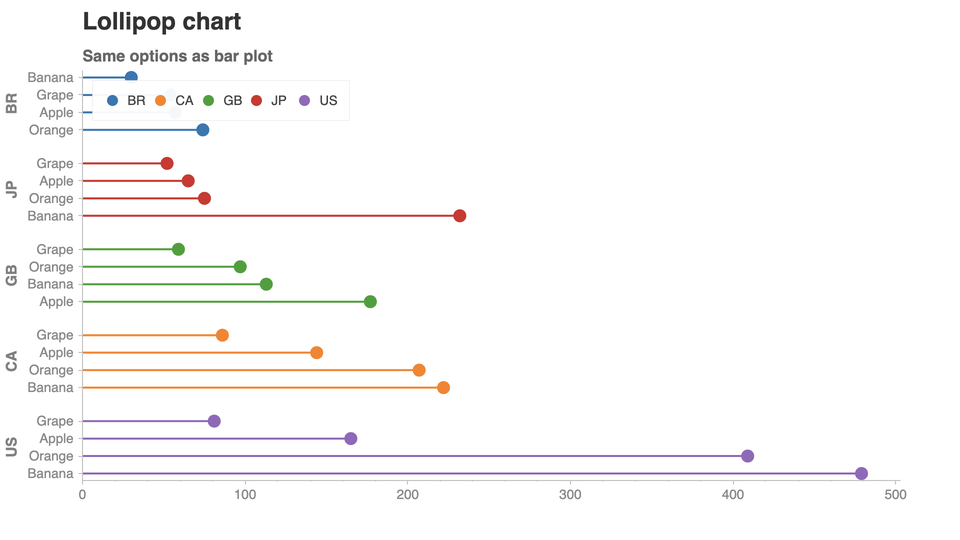

In [12]:
print(chartify.examples.plot_lollipop.__doc__)
chartify.examples.plot_lollipop()

## Bar (Stacked)

Plot stacked bar chart.

        Note:
            - To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.
            - Stacked numeric values must be all positive or all negative.
            To plot both positive and negative values on the same chart
            call this method twice. Once for the positive values and
            once for the negative values.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on
                the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            stack_column (str): Column name to group by on the stack dimension.
            normalize (bool, optional): Normalize numeric dimension for
                100% stacked bars. Default False.
            stack_order (list, optional): List of values within the
                'stack_column' dimension for specif

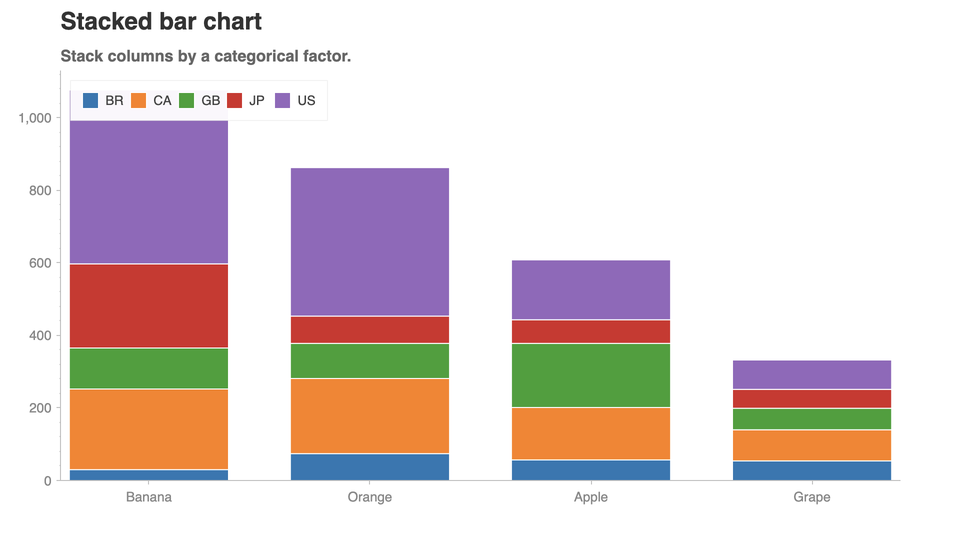


    (
        chartify.Chart(blank_labels=True, x_axis_type="categorical")
        .set_title("Grouped bar chart - Normalized")
        .set_subtitle("Set the 'normalize' parameter for 100% bars.")
        .plot.bar_stacked(
            data_frame=quantity_by_fruit_and_country,
            categorical_columns=["fruit"],
            numeric_column="quantity",
            stack_column="country",
            normalize=True,
        )
        .show('png')
    )



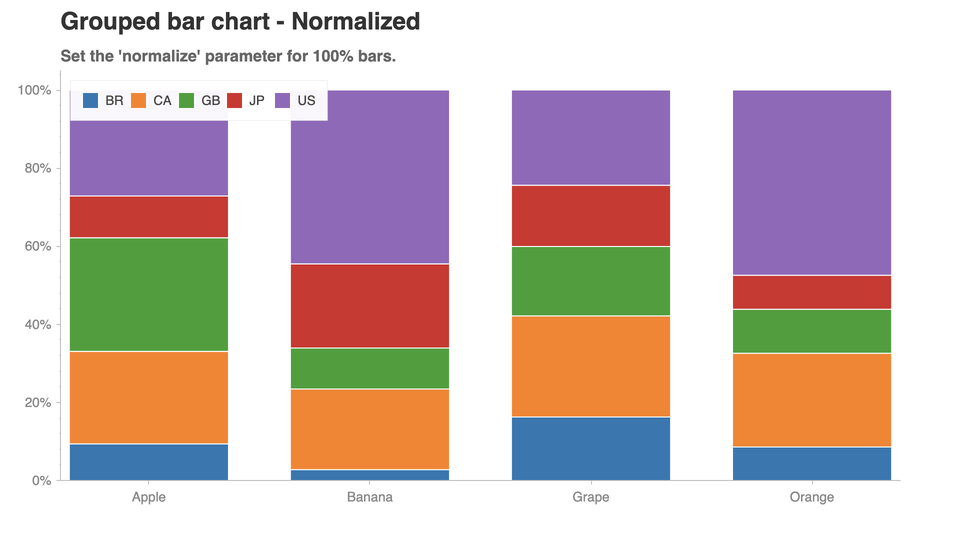


    # Get the ordered list of quantity by country to order the stacks.
    country_order = (
        quantity_by_fruit_and_country.groupby("country")["quantity"].sum().sort_values(ascending=False).index
    )
    (
        chartify.Chart(blank_labels=True, x_axis_type="categorical")
        .set_title("Grouped bar chart - Ordered stack")
        .set_subtitle("Change the order of the stack with `stack_order`.")
        .plot.bar_stacked(
            data_frame=quantity_by_fruit_and_country,
            categorical_columns=["fruit"],
            numeric_column="quantity",
            stack_column="country",
            normalize=True,
            stack_order=country_order,
        )
        .show('png')
    )
    


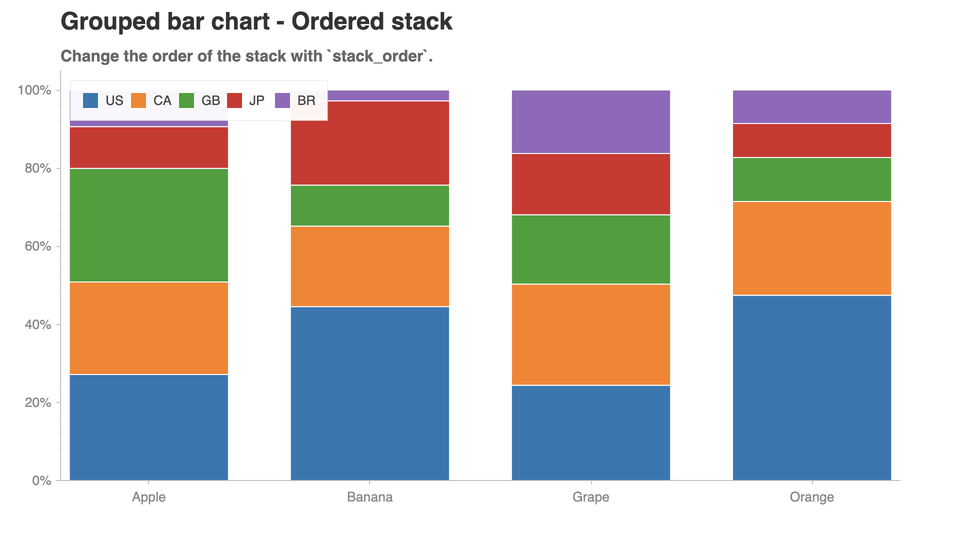


    # Add a column for labels.
    # Note: Null labels will not be added to the chart.
    quantity_by_fruit_and_country["label"] = np.where(
        quantity_by_fruit_and_country["country"].isin(["US", "CA"]),
        quantity_by_fruit_and_country["quantity"],
        None,
    )

    (
        chartify.Chart(blank_labels=True, x_axis_type="categorical")
        .set_title("Stacked bar with labels")
        .set_subtitle("")
        .plot.bar_stacked(
            data_frame=quantity_by_fruit_and_country,
            categorical_columns=["fruit"],
            numeric_column="quantity",
            stack_column="country",
            normalize=True,
            stack_order=country_order,
        )
        .plot.text_stacked(
            data_frame=quantity_by_fruit_and_country,
            categorical_columns=["fruit"],
            numeric_column="quantity",
            stack_column="country",
            text_column="label",
            normalize=True,
            stack_order=country_

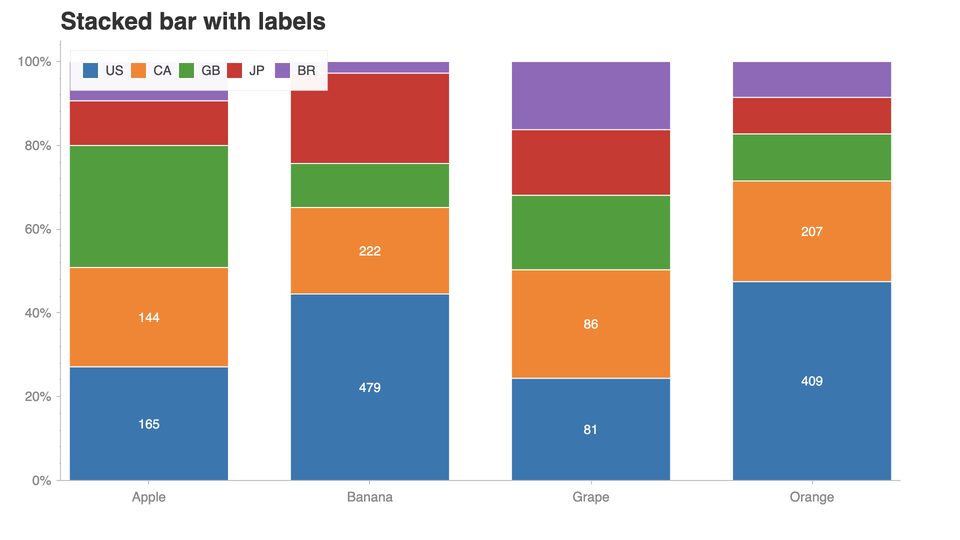

In [13]:
print(chartify.examples.plot_bar_stacked.__doc__)
chartify.examples.plot_bar_stacked()

# Parallel coordinate plot

Parallel coordinate plot.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on
                the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional): List of values within the
                'color_column' for specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'values'.
                - 'values': Order categorical axis by the numerical axis values.
                - 'labels': Order categorical axis by the categorical labels.
                - array-like object (list, tuple, np.array): New labels
                    to conform the categorical axis to.
            categorical_order_ascending (bool

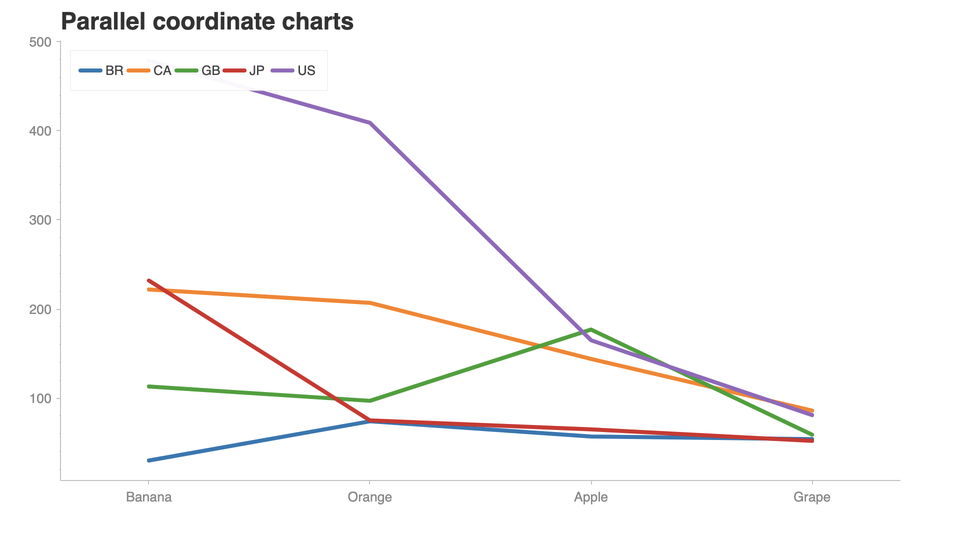

In [14]:
print(chartify.examples.plot_parallel.__doc__)
chartify.examples.plot_parallel()

Scatter chart.

        Note:
            To change the orientation set x_axis_type or y_axis_type
            argument of the Chart object.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            categorical_columns (str or list): Column name to plot on
                the categorical axis.
            numeric_column (str): Column name to plot on the numerical axis.
            size_column (str, optional): Column name of numerical values
                to plot on the size dimension.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional):
                List of values within the 'color_column' for
                    specific color sort.
            categorical_order_by (str or array-like, optional):
                Dimension for ordering the categorical axis. Default 'count'.
                - 'count': Order categorical axis by the count of values.
    

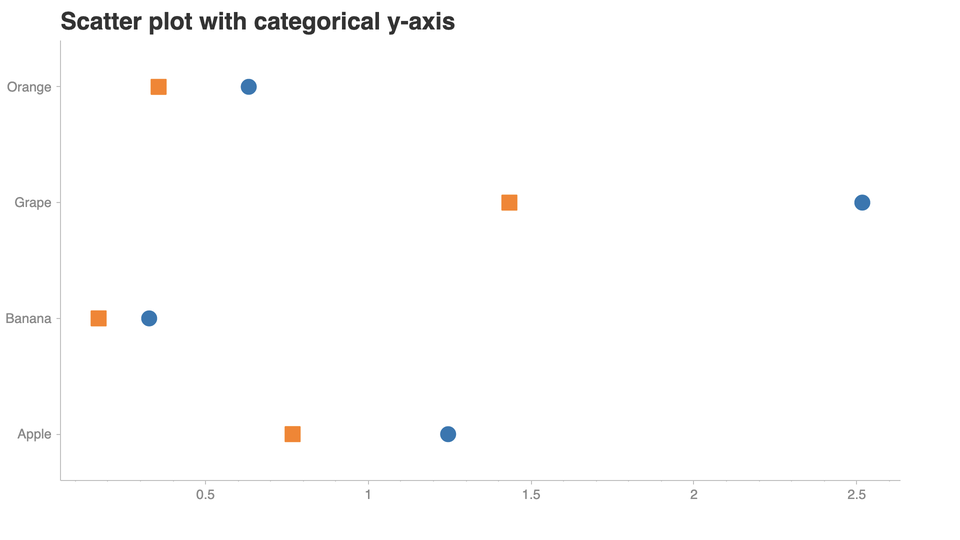

In [15]:
print(chartify.examples.plot_scatter_categorical.__doc__)
chartify.examples.plot_scatter_categorical()

# Both categorical axes

## Heatmap

Heatmap.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            x_column (str): Column name to plot on the x axis.
            y_column (str): Column name to plot on the y axis.
            color_column (str): Column name of numerical type to plot on
                the color dimension.
            text_column (str or None): Column name of the text labels.
            color_palette (str, chartify.ColorPalette): Color palette to
                apply to the heatmap.
                See chartify.color_palettes.show() for available color palettes.
            reverse_color_order (bool): Reverse order of the color palette.
            text_color (str): Color name or hex value.
                See chartify.color_palettes.show() for available color names.
            text_format: Python string formatting to apply to the text labels.
            color_value_min (float): Minimum value for the color palette.
                If None, will default to the m

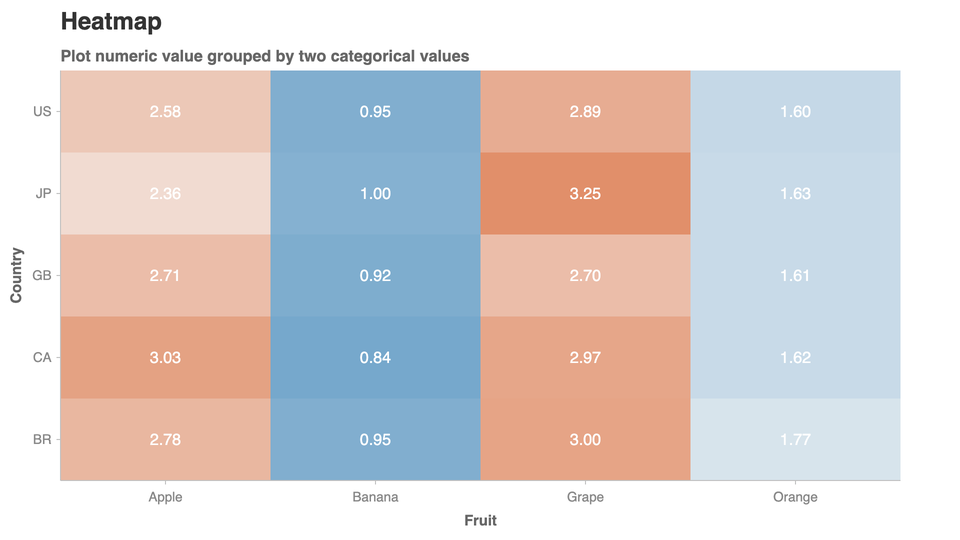

In [16]:
print(chartify.examples.plot_heatmap.__doc__)
chartify.examples.plot_heatmap()

# Single density axis

Kernel Density Estimate Plot.

        Args:
            data_frame (pandas.DataFrame): Data source for the plot.
            values_column (str): Column of numeric values.
            color_column (str, optional): Column name to group by on
                the color dimension.
            color_order (list, optional): List of values within the
                'color_column' for specific sorting of the colors.
        

    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    print(data.head())
    
        date country   fruit  unit_price  quantity  total_price
0 2017-10-21      US  Banana    0.303711         4     1.214846
1 2017-05-30      JP  Banana    0.254109         4     1.016436
2 2017-05-21      CA  Banana    0.268635         4     1.074539
3 2017-09-18      BR   Grape    2.215277         2     4.430554
4 2017-12-08      US  Banana    0.308337         5     1.541687

    # Plot the data
    ch = chartify.Chart(blank_labels=True, y_axis

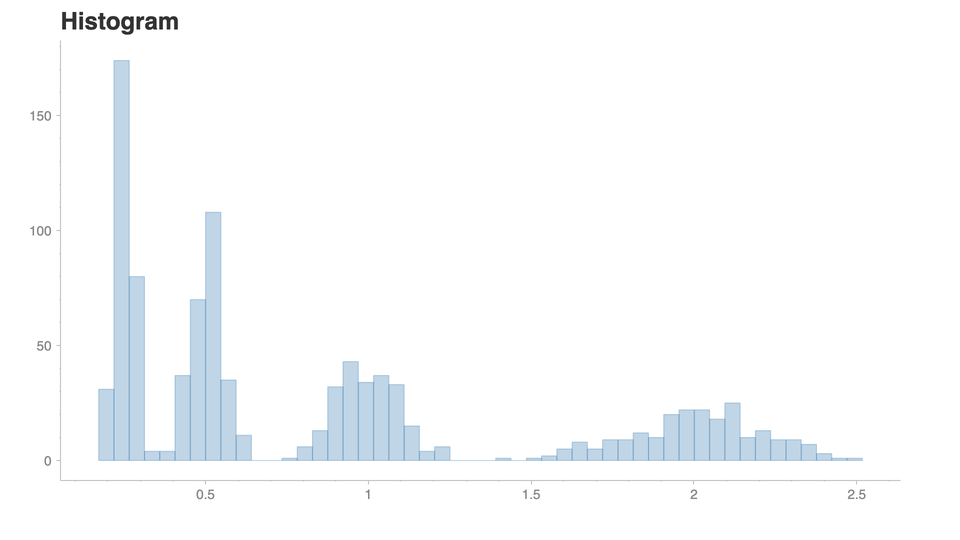


    ch = chartify.Chart(blank_labels=True, x_axis_type="density")
    ch.set_title("Horizontal histogram with grouping")
    ch.set_subtitle("")
    ch.plot.histogram(data_frame=data, values_column="unit_price", color_column="fruit")
    ch.show('png')



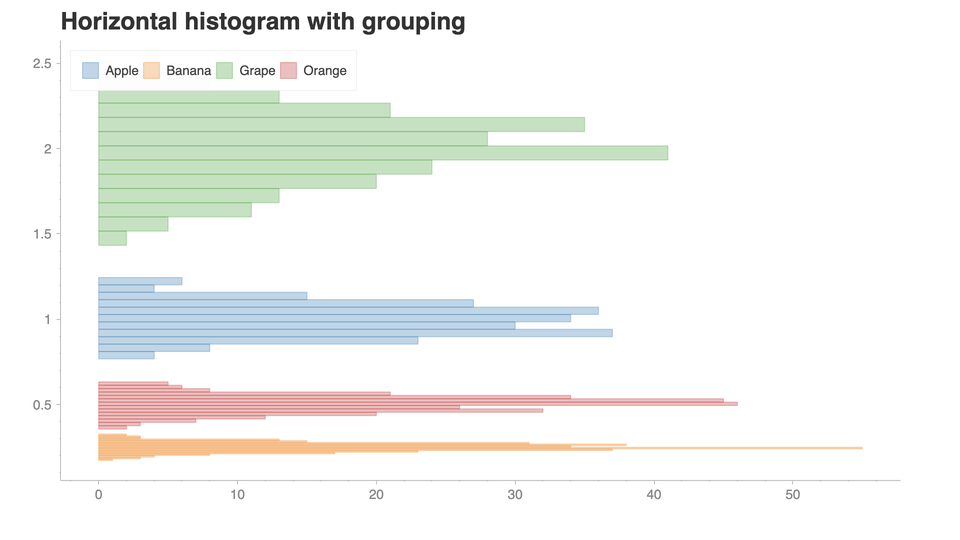

In [17]:
print(chartify.examples.plot_histogram.__doc__)
chartify.examples.plot_histogram()


    KDE example
    

    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    print(data.head())
    
        date country   fruit  unit_price  quantity  total_price
0 2017-10-21      US  Banana    0.303711         4     1.214846
1 2017-05-30      JP  Banana    0.254109         4     1.016436
2 2017-05-21      CA  Banana    0.268635         4     1.074539
3 2017-09-18      BR   Grape    2.215277         2     4.430554
4 2017-12-08      US  Banana    0.308337         5     1.541687

    # Plot the data
    ch = chartify.Chart(blank_labels=True, y_axis_type="density")
    ch.set_title("KDE plot")
    ch.plot.kde(data_frame=data, values_column="unit_price", color_column="fruit")
    ch.show('png')



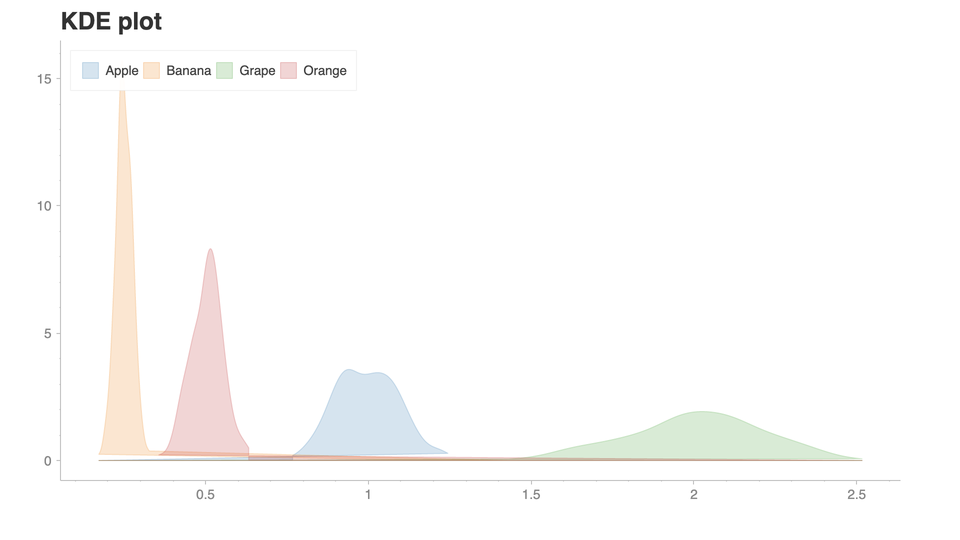


    # Plot the data
    ch = chartify.Chart(blank_labels=True, y_axis_type="density")
    ch.set_title("KDE plot + Histogram")
    ch.plot.kde(data_frame=data, values_column="unit_price", color_column="fruit")
    ch.style.color_palette.reset_palette_order()
    ch.plot.histogram(
        data_frame=data,
        values_column="unit_price",
        color_column="fruit",
        method="density",
    )
    ch.show('png')



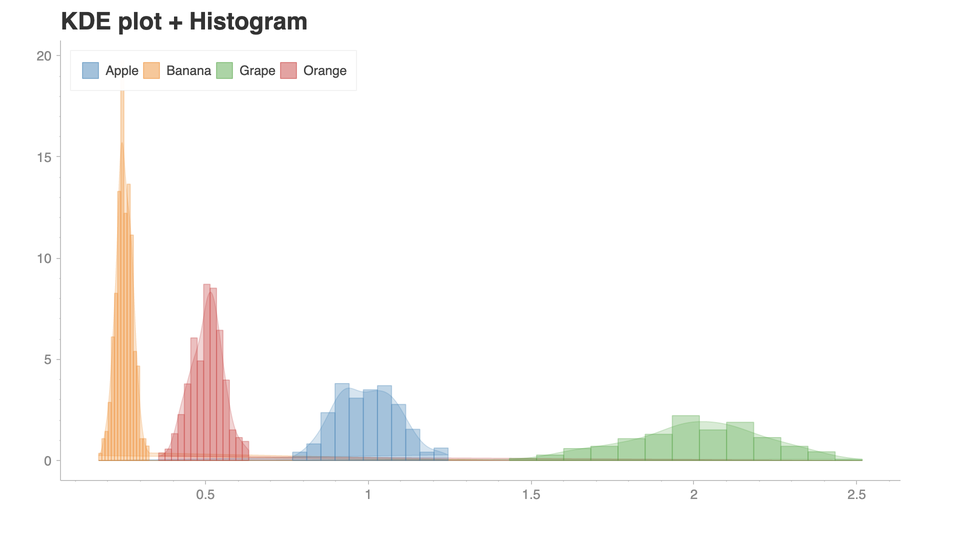

In [18]:
print(chartify.examples.plot_kde.__doc__)
chartify.examples.plot_kde()

# Both density axes


    Hexbin example
    

    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    ch = chartify.Chart(blank_labels=True, x_axis_type="density", y_axis_type="density")
    ch.set_title("Hexbin")
    ch.plot.hexbin(
        data_frame=data,
        x_values_column="unit_price",
        y_values_column="quantity",
        size=0.2,
        orientation="pointytop",
    )
    ch.show('png')



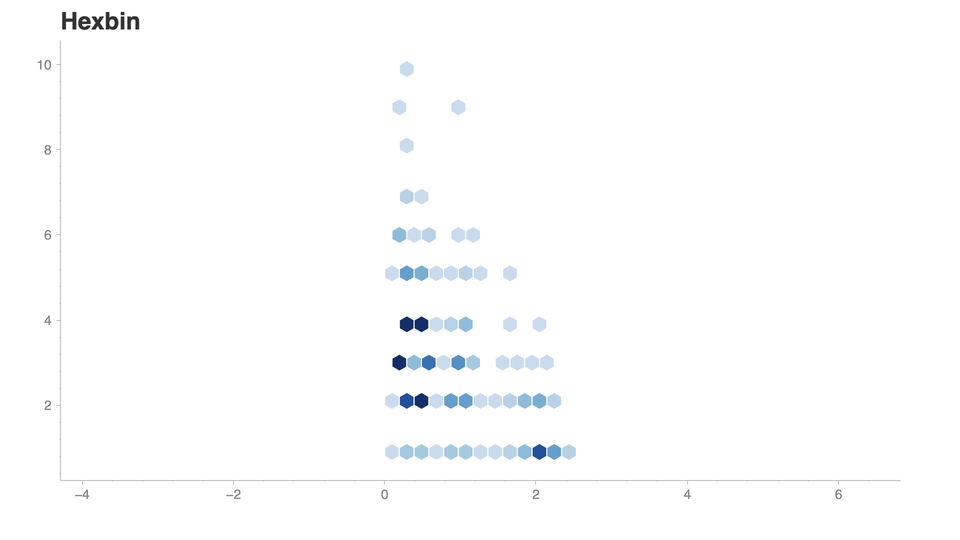

In [19]:
print(chartify.examples.plot_hexbin.__doc__)
chartify.examples.plot_hexbin()

# Second Y axis


    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Sum price grouped by date
    price_by_date = data.groupby("date")["total_price"].sum().reset_index()  # Move 'date' from index to column
    price_by_date["triple_total_price"] = price_by_date["total_price"] * 3
    price_by_date = price_by_date.sort_values("date")
    print(price_by_date.head())
    
        date  total_price  triple_total_price
0 2017-01-10     1.808778            5.426334
1 2017-01-12     0.829621            2.488864
2 2017-01-22     1.998476            5.995427
3 2017-01-27     1.390764            4.172292
4 2017-01-28     2.658465            7.975394

    # Initialize chart with second_y_axis=True
    ch = chartify.Chart(
        blank_labels=True,
        x_axis_type="datetime",
        y_axis_type="linear",
        second_y_axis=True,
    )
    ch.set_title("Second Y axis")
    # Plot the first axis
    ch.plot.line(data_frame=price_by_date, x_column="date", y_c

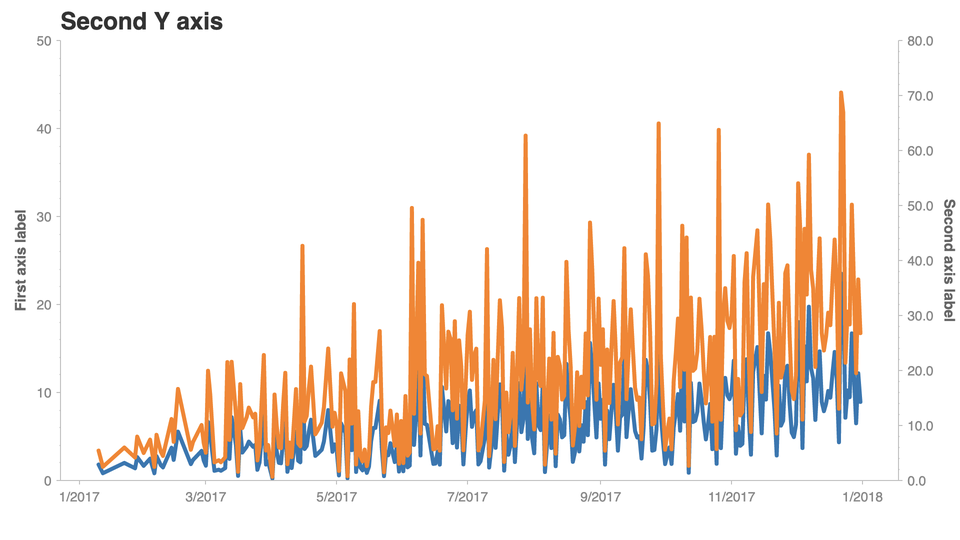

In [20]:
chartify.examples.chart_second_axis()

# Radar chart


    import chartify

    # Generate example data
    data = chartify.examples.example_data()
    total_by_fruit_and_country = data.groupby(["fruit", "country"])["quantity"].sum().reset_index()
    print(total_by_fruit_and_country.head())
    
   fruit country  quantity
0  Apple      BR        57
1  Apple      CA       144
2  Apple      GB       177
3  Apple      JP        65
4  Apple      US       165

    ch = chartify.RadarChart(True, layout="slide_50%")
    ch.set_title("Radar Area Chart")
    ch.set_subtitle("Each vertex plotted counterclockwise starting from top")
    ch.plot.text(
        total_by_fruit_and_country.groupby("country")["quantity"].max().reset_index(),
        "quantity",
        text_column="country",
        text_align="center",
    )
    ch.plot.area(total_by_fruit_and_country, "quantity", color_column="fruit")
    ch.axes.hide_yaxis()
    ch.axes.hide_xaxis()
    ch.set_legend_location("outside_bottom")
    ch.show('png')



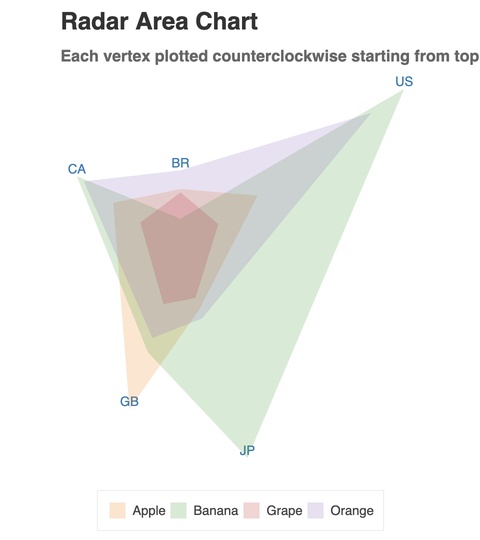

In [21]:
chartify.examples.plot_radar_area()


    import chartify
    from itertools import product

    # Generate example data
    data = chartify.examples.example_data()

    total_by_country = data.groupby(["country"])["quantity"].sum().reset_index()
    countries = total_by_country.country.unique()
    grid_values = product(range(0, 1200, 200), countries)
    grid_df = pd.DataFrame.from_records(grid_values, columns=["quantity", "country"])
    quantity_label = grid_df.groupby("quantity")[["quantity"]].min().reset_index(drop=True)

    ch = chartify.RadarChart(True, layout="slide_50%")
    ch.set_title("Radar Radius Chart")

    ch.style.set_color_palette("categorical", ["grey"])
    # Plot quantity labels
    ch.plot.text(
        quantity_label,
        "quantity",
        text_column="quantity",
        color_column="quantity",
        font_size="8pt",
    )
    # Plot perimeter grid
    ch.plot.perimeter(grid_df, radius_column="quantity", color_column="quantity", line_width=1)
    ch.style.set_color_palette("categorical")

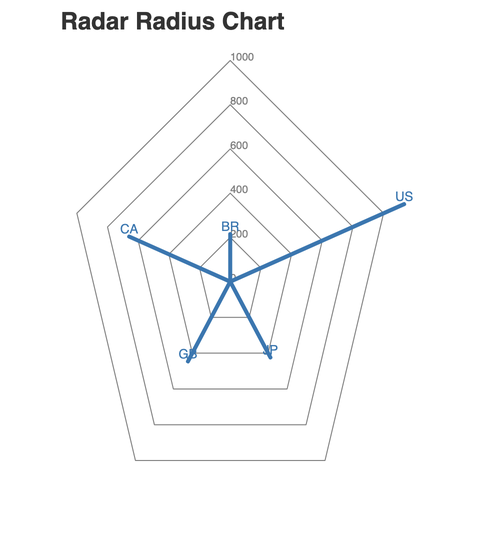

In [22]:
chartify.examples.plot_radar_radius()

# Chart aesthetics

## Labels


    Chart label examples
    

    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    apple_prices = data[data["fruit"] == "Apple"].groupby(["quantity"])["unit_price"].mean().reset_index()
    # Plot the data with method chaining
    (
        chartify.Chart(blank_labels=True)
        .plot.scatter(apple_prices, "quantity", "unit_price")
        .set_title("Quantity decreases as price increases. <--  Use title for takeaway.")
        .set_subtitle("Quantity vs. Price. <-- Use subtitle for data description.")
        .axes.set_xaxis_label("Quantity per sale (Apples)")
        .axes.set_yaxis_label("Price ($)")
        .axes.set_yaxis_tick_format("$0.00")
        .show('png')
    )



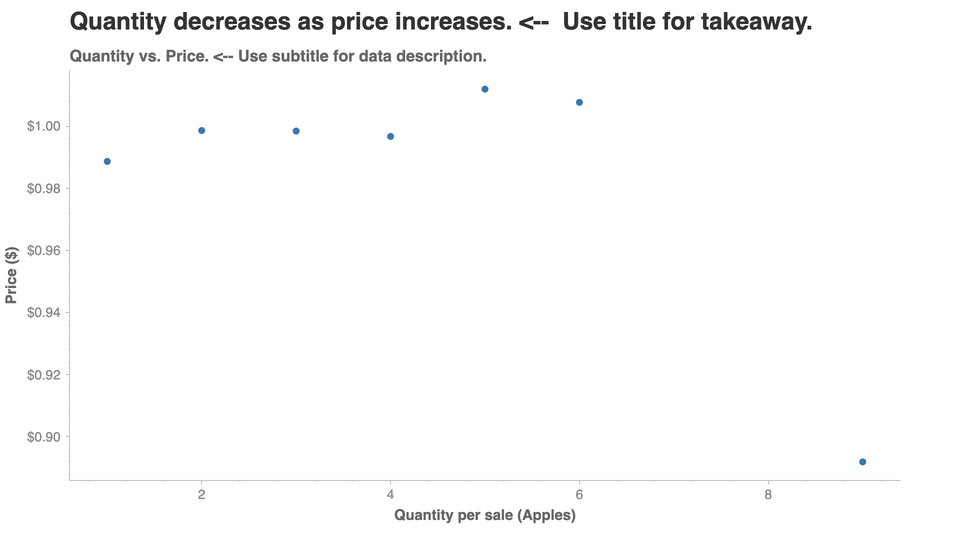

In [23]:
print(chartify.examples.chart_labels.__doc__)
chartify.examples.chart_labels()

# Axis type



    Axis type examples
    

    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Plot the data
    (
        chartify.Chart(blank_labels=True, x_axis_type="log")
        .plot.scatter(data_frame=data, x_column="total_price", y_column="quantity")
        .set_subtitle("Set axis type for auto handling of categorical, datetime, linear, or log values.")
        .set_title("Axis Type")
        .show('png')
    )



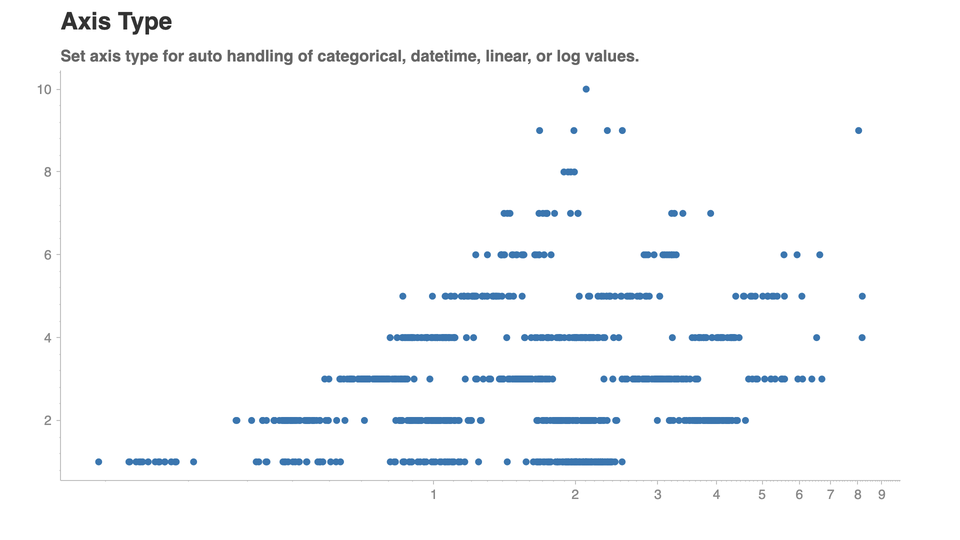

In [24]:
print(chartify.examples.axes_axis_type.__doc__)
chartify.examples.axes_axis_type()

# Tick label format


    import chartify

    # Generate example data
    data = chartify.examples.example_data()
    data["%_sales"] = data["quantity"] / data["quantity"].sum()

    # Plot the data
    (
        chartify.Chart(blank_labels=True)
        .plot.scatter(data_frame=data, x_column="%_sales", y_column="unit_price")
        .axes.set_yaxis_tick_format("$0.00")
        .axes.set_xaxis_tick_format("0.00%")
        .set_subtitle("Format ticks on either axis to set units or precision")
        .set_title("Axis tick format")
        .show('png')
    )



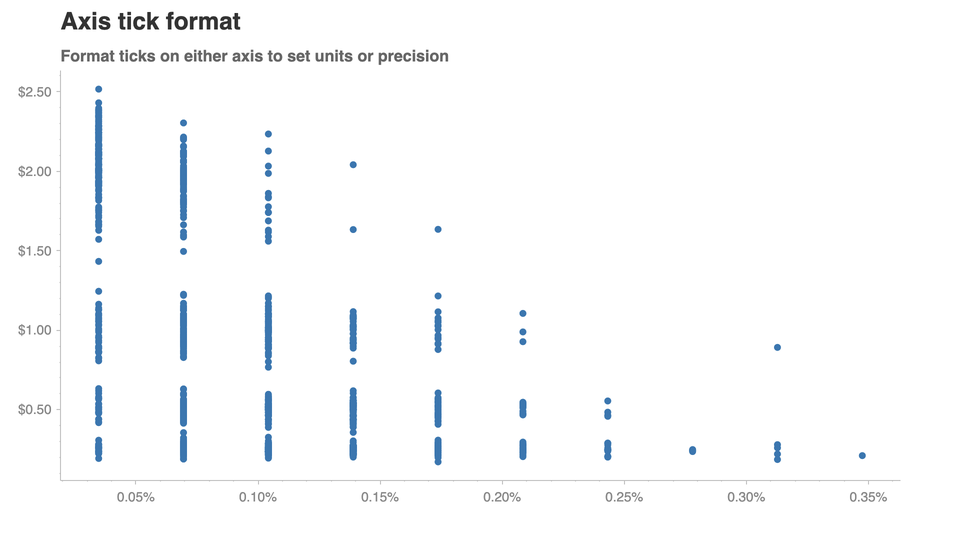

In [25]:
chartify.examples.axes_axis_tick_format()

# Axis tick values


    import pandas as pd
    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type="datetime")
    ch.plot.scatter(data, "date", "quantity")
    ch.set_title("Axis tick values")
    ch.set_subtitle("Pass a list of values or use pd.date_range for datetime axes")
    # Use pd.date_range to generate a range of dates
    # at the start of each month
    ch.axes.set_xaxis_tick_values(pd.date_range("2017-01-01", "2018-01-01", freq="MS"))
    ch.axes.set_yaxis_tick_values(list(range(0, 8, 2)))
    ch.show('png')



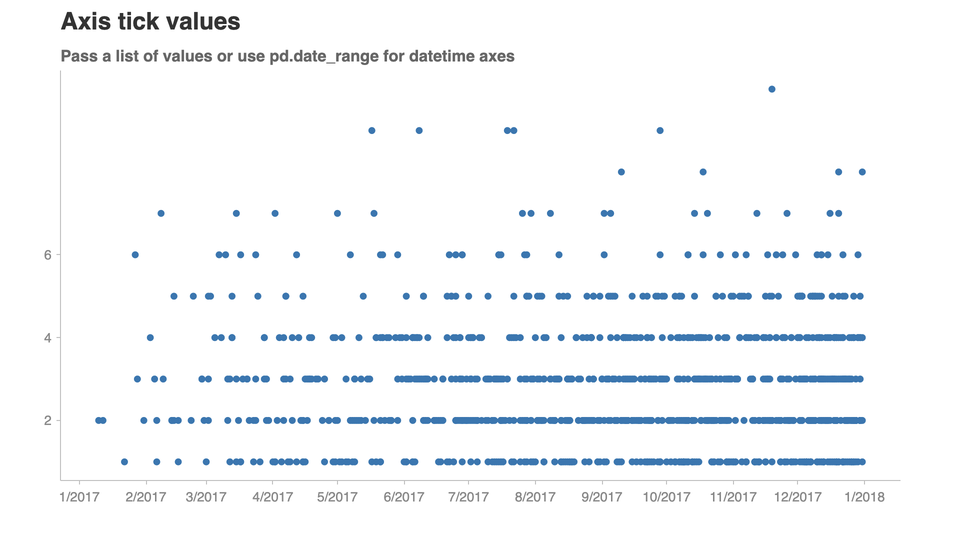

In [26]:
chartify.examples.axes_axis_tick_values()

# Callouts

## Line callout


    Line example
    

    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Plot the data
    (
        chartify.Chart(blank_labels=True)
        .plot.scatter(data_frame=data, x_column="unit_price", y_column="total_price")
        .callout.line(2)  # Callout horizontal line
        .callout.line(1, "height")  # Callout vertical line
        .set_title("Line callout")
        .set_subtitle("Callout lines on either axis")
        .show('png')
    )



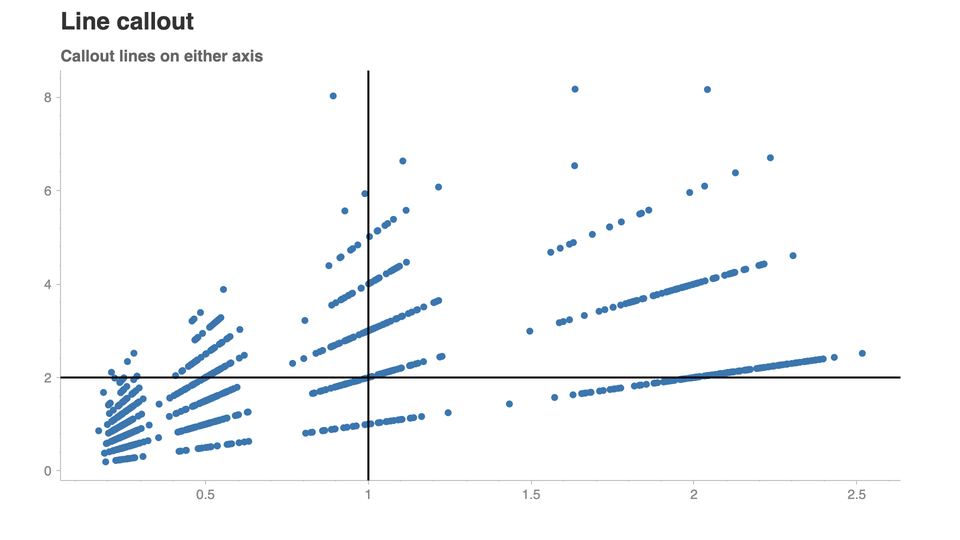

In [27]:
print(chartify.examples.callout_line.__doc__)
chartify.examples.callout_line()

## Box callout

Add box callout to the chart.

        Args:
            top (numeric, optional): Top edge of the box.
            bottom (numeric, optional): Bottom edge of the box.
            left (numeric, optional): Left edge of the box.
            right (numeric, optional): Right edge of the box.
            alpha (float, optional): 0.2
            color (str): Color name or hex value.
                See chartify.color_palettes.show() for available color names.

        Note:
            The box will extend to the edge if the corresponding position
            argument is omitted.

        Returns:
            Current chart object
        

    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Plot the data
    (
        chartify.Chart(blank_labels=True)
        .plot.scatter(data_frame=data, x_column="total_price", y_column="unit_price")
        .callout.box(top=1, bottom=-1, color="red")
        .callout.box(top=2, left=4, color="blue")
        .

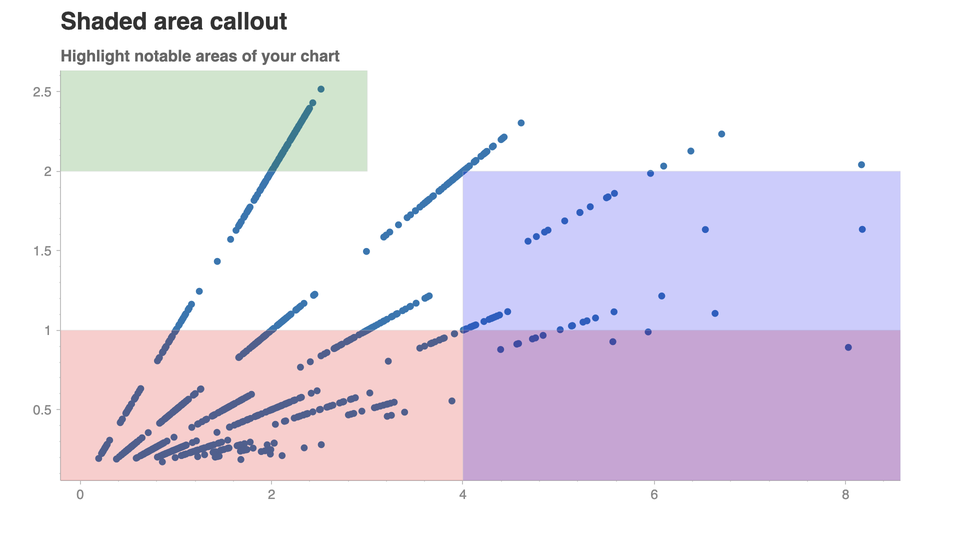

In [28]:
print(chartify.examples.callout_box.__doc__)
chartify.examples.callout_box()

## Text callout

Add text callout to the chart.

        Note:
            Use `
` within text for newlines.
        Args:
            x (numeric): x location of the text.
            y (numeric, optional): y location of the text.
            text_color (str): Color name or hex value.
                See chartify.color_palettes.show() for available color names.
            text_align (str: 'left', 'right', 'center'): Text alignment.
            font_size (str): Font size.
            angle (int, 0 to 360): Angle in degrees from horizontal. Default: 0

        Returns:
            Current chart object
        

    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Plot the data
    ch = chartify.Chart(blank_labels=True)
    ch.plot.scatter(data_frame=data, x_column="unit_price", y_column="total_price")
    ch.callout.text("Description of what is\ngoing on in this chart!", 0, 6)
    ch.set_title("Text callout")
    ch.set_subtitle("Add narrative to your chart

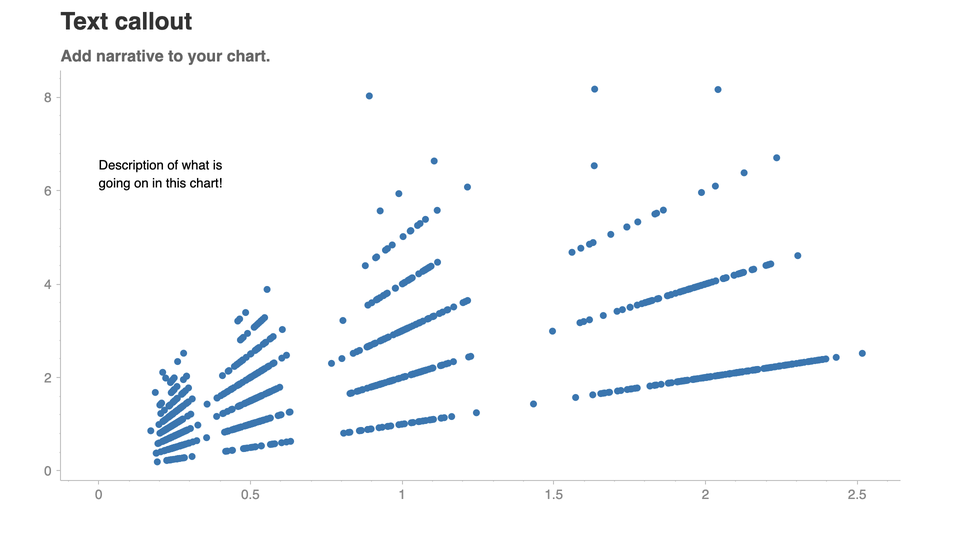

In [29]:
print(chartify.examples.callout_text.__doc__)
chartify.examples.callout_text()

# Color Palettes

In [30]:
chartify.color_palettes

Color Palettes: 
'Category20'
'Category10'
'Colorblind'
'Dark2'
'Pastel1'
'RdBu'
'RdGy'
'Greys'
'Greens'
'Blues'
'Reds'
'Oranges'
'All colors'

In [31]:
chartify.color_palettes.show()

## Categorical


    Color palette
    

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = pd.DataFrame({"x": list(range(100))})
    data["y"] = data["x"] * np.random.normal(size=100)
    data["z"] = np.random.choice([2, 4, 5], size=100)
    data["country"] = np.random.choice(["US", "GB", "CA", "JP", "BR"], size=100)

    # Plot the data
    ch = chartify.Chart(blank_labels=True)
    ch.style.set_color_palette(palette_type="categorical")
    ch.plot.scatter(data_frame=data, x_column="x", y_column="y", color_column="country")
    ch.set_title("Categorical color palette type")
    ch.set_subtitle("Default palette type. Use to differentiate categorical series.")
    ch.show('png')
    


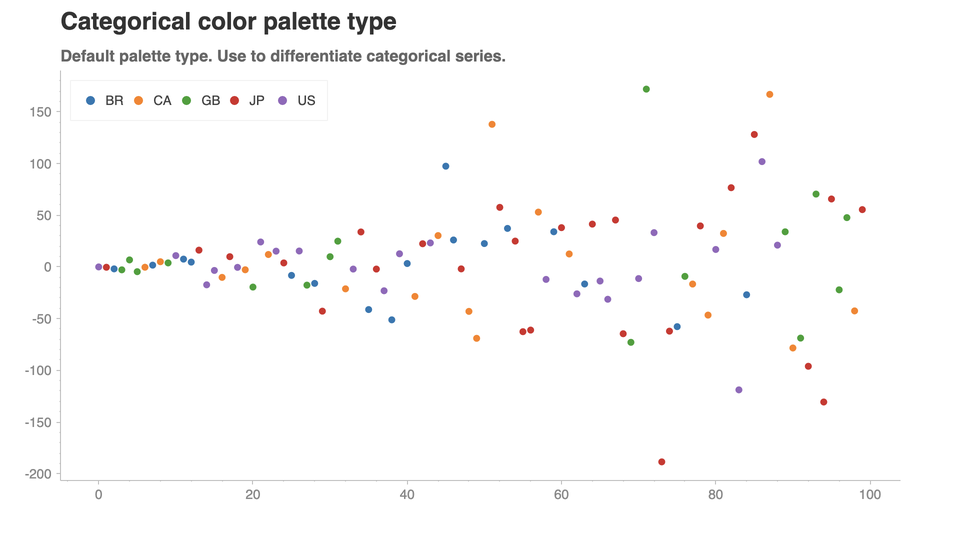


    # Plot the data
    ch = chartify.Chart(blank_labels=True)
    ch.style.set_color_palette(
        palette_type="categorical",
    )
    ch.plot.scatter(data_frame=data, x_column="x", y_column="y", color_column="country")
    ch.set_title("Pass 'palette' parameter to .set_color_palette() to change palette colors.")
    ch.set_subtitle("")
    ch.show('png')



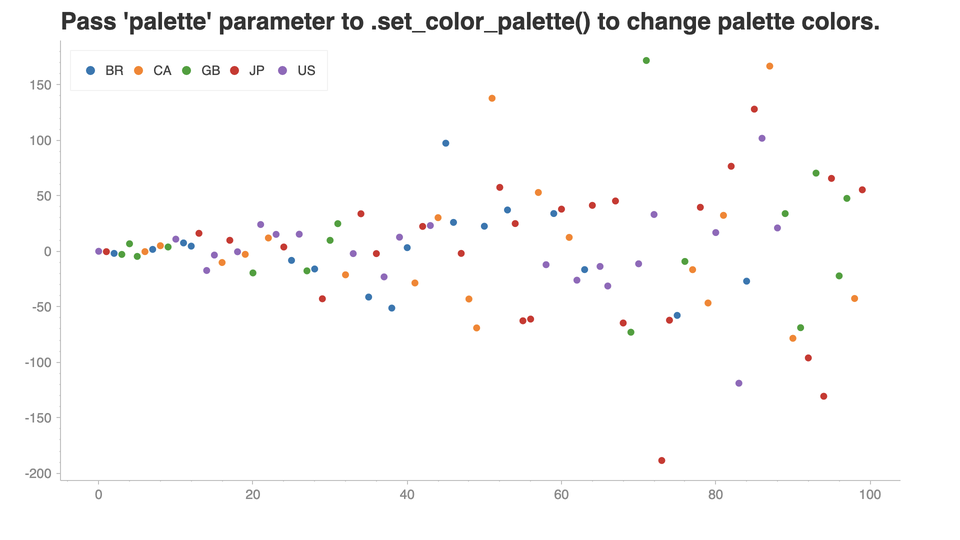

In [32]:
print(chartify.examples.style_color_palette_categorical.__doc__)
chartify.examples.style_color_palette_categorical()

# Accent


    Color palette
    

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = pd.DataFrame({"x": list(range(100))})
    data["y"] = data["x"] * np.random.normal(size=100)
    data["z"] = np.random.choice([2, 4, 5], size=100)
    data["country"] = np.random.choice(["US", "GB", "CA", "JP", "BR"], size=100)

    # Plot the data
    ch = chartify.Chart(blank_labels=True)
    ch.style.set_color_palette("accent", accent_values=["US", "CA"])
    ch.plot.scatter(
        data_frame=data,
        x_column="x",
        y_column="y",
        size_column="z",
        color_column="country",
    )
    ch.set_title("Accent color palette")
    ch.set_subtitle("Highlight specific color values or assign specific colors to values.")
    ch.show('png')



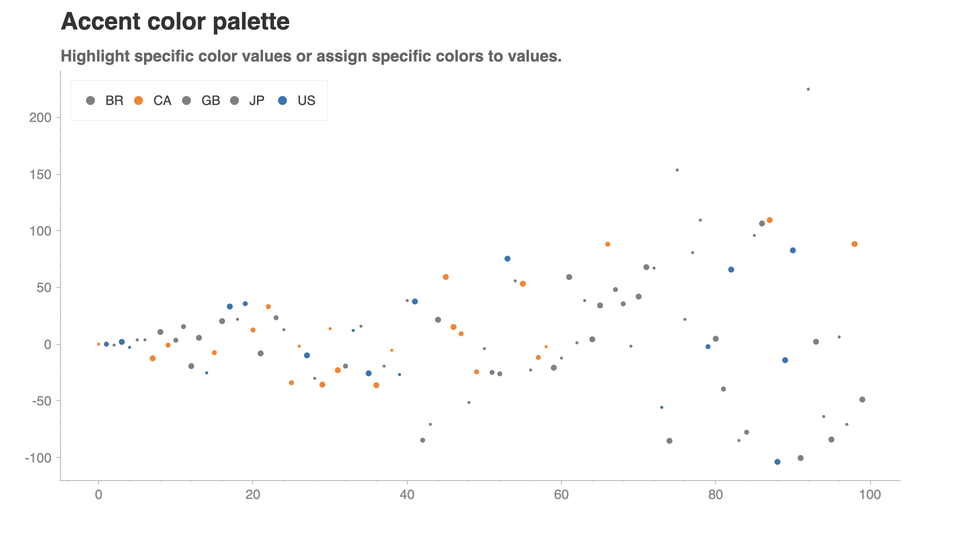

In [33]:
print(chartify.examples.style_color_palette_accent.__doc__)
chartify.examples.style_color_palette_accent()

# Sequential


    Color palette sequential
    

    import numpy as np
    import pandas as pd
    import chartify

    data = pd.DataFrame({"time": pd.date_range("2015-01-01", "2018-01-01")})
    n_days = len(data)
    data["1st"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days)
    data["2nd"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 200
    data["3rd"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 500
    data["4th"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 700
    data["5th"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 800
    data["6th"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 1000
    data = pd.melt(
        data,
        id_vars=["time"],
        value_vars=data.columns[1:],
        value_name="y",
        var_name=["grouping"],
    )

    # Plot the data
    ch = chartify.Chart(blank_labels=True, x_axis_type="datetime

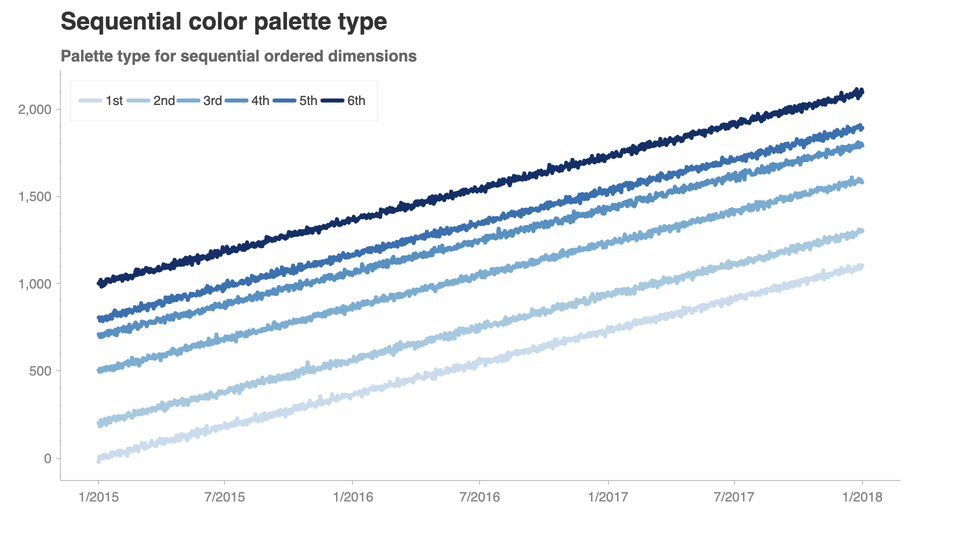

In [34]:
print(chartify.examples.style_color_palette_sequential.__doc__)
chartify.examples.style_color_palette_sequential()

# Diverging


    Color palette sequential
    

    import numpy as np
    import pandas as pd
    import chartify

    data = pd.DataFrame({"time": pd.date_range("2015-01-01", "2018-01-01")})
    n_days = len(data)
    data["Very Unlikely"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days)
    data["Unlikely"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 200
    data["Neutral"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 500
    data["Likely"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 700
    data["Very Likely"] = np.array(list(range(n_days))) + np.random.normal(0, 10, size=n_days) + 800
    data = pd.melt(
        data,
        id_vars=["time"],
        value_vars=data.columns[1:],
        value_name="y",
        var_name=["grouping"],
    )

    # Plot the data

    ch = chartify.Chart(blank_labels=True, x_axis_type="datetime")
    ch.style.set_color_palette(palette_type="diverging")
   

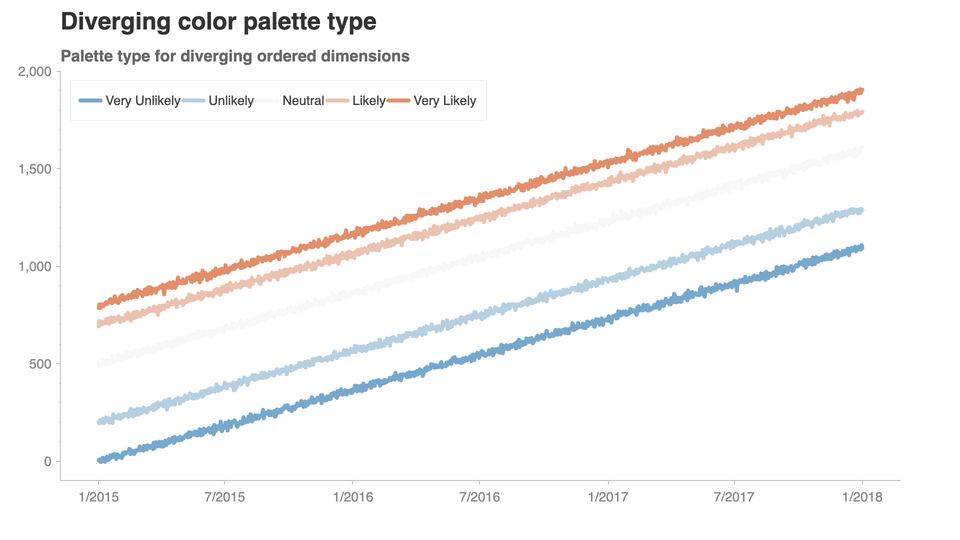

In [35]:
print(chartify.examples.style_color_palette_diverging.__doc__)
chartify.examples.style_color_palette_diverging()


    Custom color palette
    

    import chartify

    # Generate example data
    data = chartify.examples.example_data()

    # Create a new custom palette
    chartify.color_palettes.create_palette(
        colors=["#ff0000", "yellow", "purple", "orange"],
        palette_type="categorical",
        name="custom palette",
    )

    ch = chartify.Chart(blank_labels=True)
    # Apply the custom palette
    ch.style.set_color_palette("categorical", "custom palette")
    ch.plot.scatter(
        data_frame=data,
        x_column="unit_price",
        y_column="quantity",
        color_column="fruit",
    )
    ch.set_title("Custom color palette")
    ch.show('png')



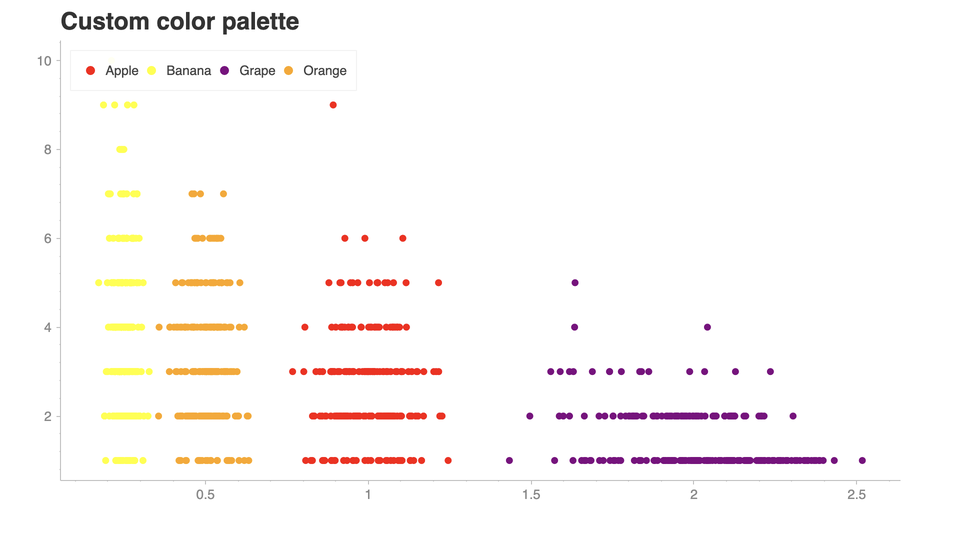

In [36]:
print(chartify.examples.style_color_palette_custom.__doc__)
chartify.examples.style_color_palette_custom()

# Layouts


    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = pd.DataFrame({"Price": list(range(100))})
    data["Demand"] = 100 + -0.5 * data["Price"] + np.random.normal(size=100)

    layouts = ["slide_100%", "slide_75%", "slide_50%", "slide_25%"]

    def display_layout(layout):
        (
            chartify.Chart(layout=layout)  # Assign the layout when instantiating the chart.
            .plot.scatter(data_frame=data, x_column="Price", y_column="Demand")
            .set_title("Slide layout: '{}'".format(layout))
            .set_subtitle("Demand vs. Price.")
            .set_source_label("")
            .axes.set_xaxis_label("Demand (# Users)")
            .axes.set_yaxis_label("Price ($)")
            .show('png')
        )

    [display_layout(layout) for layout in layouts]



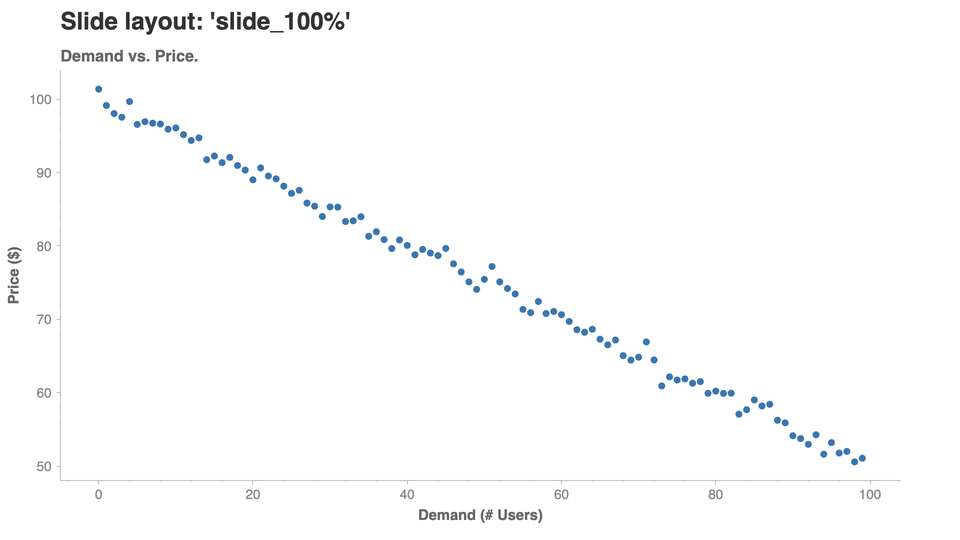

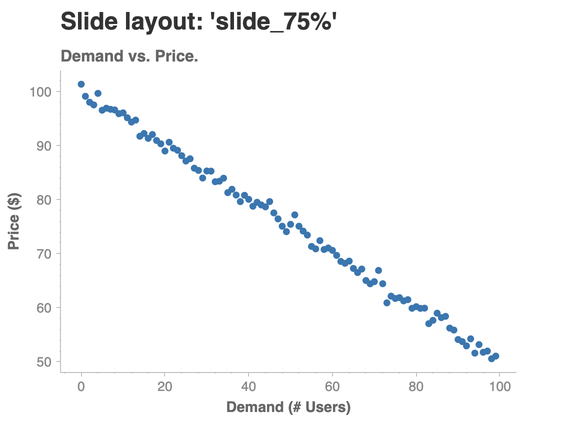

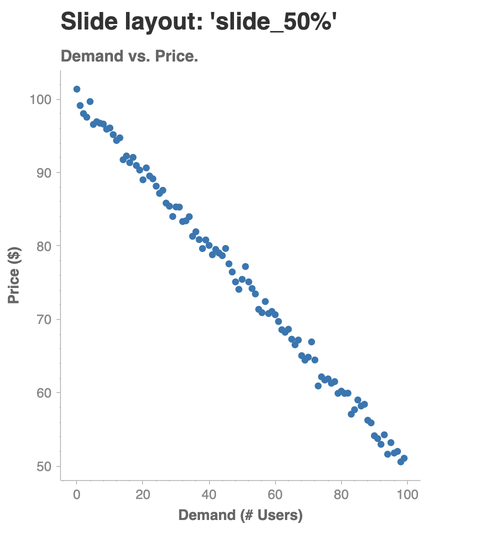

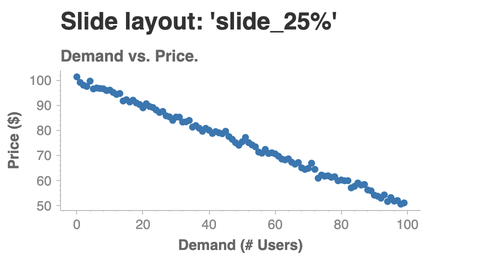

In [37]:
chartify.examples.chart_layouts()

# Show Chart

Show the chart.

        Args:
            format (str):
                - 'html': Output chart as HTML.
                    Renders faster and allows for interactivity.
                    Charts saved as HTML in a Jupyter notebooks
                    WILL NOT display on Github.
                    Logos will not display on HTML charts.
                    Recommended when drafting plots.

                - 'png': Output chart as PNG.
                    Easy to copy+paste into slides.
                    Will render logos.
                    Recommended when the plot is in a finished state.

                - 'svg': Output as SVG.
        

    import numpy as np
    import pandas as pd
    import chartify

    # Generate example data
    data = pd.DataFrame({"x": list(range(100))})
    data["y"] = data["x"] * np.random.normal(size=100)
    data["z"] = np.random.choice([2, 4, 5], size=100)
    data["country"] = np.random.choice(["US", "GB", "CA", "JP", "BR"], size=100)

    # Plot 

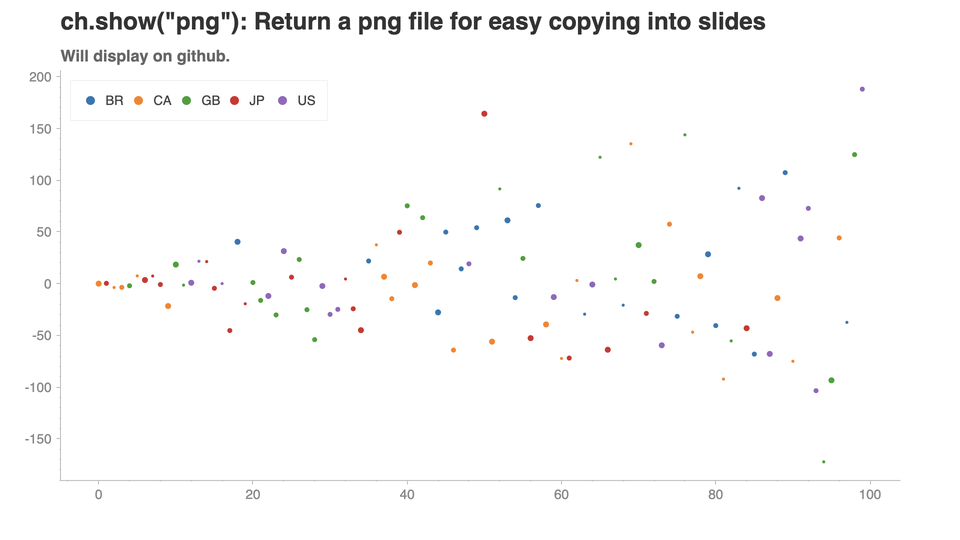

In [38]:
print(chartify.examples.chart_show.__doc__)
chartify.examples.chart_show()

# Save Chart

In [39]:
print(chartify.examples.chart_save.__doc__)
chartify.examples.chart_save()

Save the chart.

        Args:
            filename (str): Name of output file.
            format (str):
                - 'html': Output chart as HTML.
                    Renders faster and allows for interactivity.
                    Charts saved as HTML in a Jupyter notebook WILL NOT display
                    on Github.
                    Logos will not display on HTML charts.
                    Recommended when drafting plots.

                - 'png': Output chart as PNG.
                    Easy to paste into google slides.
                    Recommended when the plot is in a finished state.
                    Will render logos.

                - 'svg': Output as SVG.
        

    import chartify

    # Plot the data
    ch = chartify.Chart(blank_labels=True)
    ch.set_title("ch.show(): Save chart to html, png, or svg.")
    ch.save("saved_chart_example.html", format="html")  # Save to html

Saved to saved_chart_example.html
